# FASE 1 - PREPROCESAMIENTO

### Gestión de dependencias: instalación y verificación de paquetes

In [1]:
import importlib
import subprocess

librerias_requeridas = ['numpy', 'matplotlib', 'scikit-learn', 'pandas', 'seaborn']

for lib in librerias_requeridas:
    try:
        importlib.import_module(lib)
        print(f'{lib} ya está instalada.')
    except ImportError:
        print(f'{lib} no está instalada. Instalando {lib}...')
        subprocess.check_call(['pip3', 'install', lib])

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics.pairwise import euclidean_distances

from sklearn.model_selection import GridSearchCV
import multiprocessing
from sklearn.model_selection import RepeatedKFold

import glob
import pandas as pd
import shutil
import pickle
import time
import datetime
import os

import seaborn as sns
sns.set_theme(style="whitegrid")

numpy ya está instalada.
matplotlib ya está instalada.
scikit-learn no está instalada. Instalando scikit-learn...
pandas ya está instalada.
seaborn ya está instalada.


### Funciones

In [2]:
def string2params(string, show=True):
    # Separamos la cadena en tres partes usando "g" y "v" como delimitadores
    s1 = string.partition("g")
    t = s1[0][1:] # Extraemos el valor de la temperatura a partir de la primera parte de la cadena
    s2 = s1[2].partition("v")
    g = s2[0] # Extraemos el valor de la gravedad superficial a partir de la segunda parte de la cadena
    v = s2[-1] # Extraemos el valor de la velocidad de rotación a partir de la tercera parte de la cadena
    if show: # Si show es True (verdadero), imprimimos los valores de la cadena extraídos
        print(s1)
        print("t:",t)
        print(s2)
        print("g: ",float(g)/10) # Convertimos el valor de la gravedad superficial de décimas de dex a unidades
        print("v:", v)
    return float(t), float(g)/10, float(v) # Devolvemos los valores de temperatura, gravedad superficial y velocidad de rotación en una tupla

### Listado de archivos

In [3]:
files = glob.glob('../filtered_wv_models/*')
m = len(files)
print("Número de archivos en modelos: ", m)

Número de archivos en modelos:  5425


### Matrices X e Y

In [4]:
# Imprimir dimensiones de X e y
print("--> X tiene dimensión", m, " x 201")
print("--> y tiene dimensión", m, " x 3")

# Inicializar y con ceros
y = np.zeros((m,3))

# Leer el primer archivo y obtener los puntos en el eje x
df = pd.read_csv(files[0], sep=" ", header=None)
x_points = df[0].values

# Obtener el número de puntos en el eje x
n_points, n_columns = df.shape
display(df[1].values.shape)
print("Número de puntos en eje x: ", n_points)

--> X tiene dimensión 5425  x 201
--> y tiene dimensión 5425  x 3


(201,)

Número de puntos en eje x:  201


In [5]:

# X matriz, contiene línea espectral
X = np.zeros((m,n_points))
# y matriz, contiene las etiquetas de cada línea espectral
y = np.zeros((m,3))

list_onda = []
list_flujo = []

    
for i,name in enumerate(files):
    file_name = name.split("/")[-1].split(".")[0]
    print(file_name)
    df = pd.read_csv(name, sep=" ", header=None)
    
    onda = df[0].values
    flujo = df[1].values
    
    list_onda.append(onda)
    list_flujo.append(flujo)
    
    print(file_name.split("_")[1])
    t,g,v = string2params(file_name.split("_")[1])
    X[i,:] = df[1].values
    y[i] = t,g,v


def plot_liness(list_onda, list_flujo):
    
    '''almacenará las ondas y flujos en listas. Luego, utiliza un loop for para trazar cada línea
    en el mismo gráfico utilizando la función zip para iterar sobre las dos listas al mismo tiempo'''
    
    plt.figure(figsize=(8, 5))
    plt.title("Líneas espectrales TLUSTLY")

    # lista para almacenar los valores promedio de flujo para cada valor de onda
    avg_flux = []

    for onda, flujo in zip(list_onda, list_flujo):
        plt.plot(onda, flujo)
        avg_flux.append(flujo)

    # Calcula la media de todos los valores de flujo para cada valor de onda
    avg_flux = np.mean(avg_flux, axis=0)
    
    # Agregar el ruido a la línea promedio
    #noise_avg = np.random.normal(mu*np.mean(avg_flux), sigma*np.std(avg_flux), len(avg_flux))
    #noisy_avg_flux = avg_flux + noise_avg

    # Grafica la línea media
    line_mean, = plt.plot(list_onda[0], avg_flux, color='b', linewidth=4)

    # Encuentra los valores máximos y mínimos de x e y de la línea media
    max_y = np.max(avg_flux)
    max_x = list_onda[0][np.argmax(avg_flux)]
    min_y = np.min(avg_flux)
    min_x = list_onda[0][np.argmin(avg_flux)]

    plt.xlabel("Longitud de Onda [A]")
    plt.ylabel("Flujo normalizado")
    plt.grid()

    # Agrega los valores máximos y mínimos a la leyenda
    plt.legend([line_mean], [f"Línea promedio (punto máximo en x={max_x:.2f}, y={max_y:.2f}; punto mínimo en x={min_x:.2f}, y={min_y:.2f})"], loc='lower left')
    plt.show()

f_t35000g40v100
t35000g40v100
('t35000', 'g', '40v100')
t: 35000
('40', 'v', '100')
g:  4.0
v: 100
f_t15000g30v270
t15000g30v270
('t15000', 'g', '30v270')
t: 15000
('30', 'v', '270')
g:  3.0
v: 270
f_t24000g20v220
t24000g20v220
('t24000', 'g', '20v220')
t: 24000
('20', 'v', '220')
g:  2.0
v: 220
f_t34000g35v380
t34000g35v380
('t34000', 'g', '35v380')
t: 34000
('35', 'v', '380')
g:  3.5
v: 380
f_t16000g45v140
t16000g45v140
('t16000', 'g', '45v140')
t: 16000
('45', 'v', '140')
g:  4.5
v: 140
f_t30000g30v240
t30000g30v240
('t30000', 'g', '30v240')
t: 30000
('30', 'v', '240')
g:  3.0
v: 240
f_t21000g35v140
t21000g35v140
('t21000', 'g', '35v140')
t: 21000
('35', 'v', '140')
g:  3.5
v: 140
f_t26000g30v310
t26000g30v310
('t26000', 'g', '30v310')
t: 26000
('30', 'v', '310')
g:  3.0
v: 310
f_t22000g25v330
t22000g25v330
('t22000', 'g', '25v330')
t: 22000
('25', 'v', '330')
g:  2.5
v: 330
f_t38000g35v260
t38000g35v260
('t38000', 'g', '35v260')
t: 38000
('35', 'v', '260')
g:  3.5
v: 260
f_t30000g3

t16000g25v230
('t16000', 'g', '25v230')
t: 16000
('25', 'v', '230')
g:  2.5
v: 230
f_t25000g40v290
t25000g40v290
('t25000', 'g', '40v290')
t: 25000
('40', 'v', '290')
g:  4.0
v: 290
f_t36000g30v210
t36000g30v210
('t36000', 'g', '30v210')
t: 36000
('30', 'v', '210')
g:  3.0
v: 210
f_t16000g40v120
t16000g40v120
('t16000', 'g', '40v120')
t: 16000
('40', 'v', '120')
g:  4.0
v: 120
f_t23000g20v170
t23000g20v170
('t23000', 'g', '20v170')
t: 23000
('20', 'v', '170')
g:  2.0
v: 170
f_t17000g45v330
t17000g45v330
('t17000', 'g', '45v330')
t: 17000
('45', 'v', '330')
g:  4.5
v: 330
f_t27000g35v310
t27000g35v310
('t27000', 'g', '35v310')
t: 27000
('35', 'v', '310')
g:  3.5
v: 310
f_t24000g25v110
t24000g25v110
('t24000', 'g', '25v110')
t: 24000
('25', 'v', '110')
g:  2.5
v: 110
f_t36000g35v230
t36000g35v230
('t36000', 'g', '35v230')
t: 36000
('35', 'v', '230')
g:  3.5
v: 230
f_t39000g40v340
t39000g40v340
('t39000', 'g', '40v340')
t: 39000
('40', 'v', '340')
g:  4.0
v: 340
f_t25000g35v310
t25000g35v

t34000g35v320
('t34000', 'g', '35v320')
t: 34000
('35', 'v', '320')
g:  3.5
v: 320
f_t20000g35v220
t20000g35v220
('t20000', 'g', '35v220')
t: 20000
('35', 'v', '220')
g:  3.5
v: 220
f_t16000g50v160
t16000g50v160
('t16000', 'g', '50v160')
t: 16000
('50', 'v', '160')
g:  5.0
v: 160
f_t20000g30v350
t20000g30v350
('t20000', 'g', '30v350')
t: 20000
('30', 'v', '350')
g:  3.0
v: 350
f_t29000g45v390
t29000g45v390
('t29000', 'g', '45v390')
t: 29000
('45', 'v', '390')
g:  4.5
v: 390
f_t19000g30v320
t19000g30v320
('t19000', 'g', '30v320')
t: 19000
('30', 'v', '320')
g:  3.0
v: 320
f_t38000g35v350
t38000g35v350
('t38000', 'g', '35v350')
t: 38000
('35', 'v', '350')
g:  3.5
v: 350
f_t29000g30v210
t29000g30v210
('t29000', 'g', '30v210')
t: 29000
('30', 'v', '210')
g:  3.0
v: 210
f_t33000g30v150
t33000g30v150
('t33000', 'g', '30v150')
t: 33000
('30', 'v', '150')
g:  3.0
v: 150
f_t24000g40v250
t24000g40v250
('t24000', 'g', '40v250')
t: 24000
('40', 'v', '250')
g:  4.0
v: 250
f_t31000g20v110
t31000g20v

t18000g35v130
('t18000', 'g', '35v130')
t: 18000
('35', 'v', '130')
g:  3.5
v: 130
f_t33000g50v190
t33000g50v190
('t33000', 'g', '50v190')
t: 33000
('50', 'v', '190')
g:  5.0
v: 190
f_t22000g45v370
t22000g45v370
('t22000', 'g', '45v370')
t: 22000
('45', 'v', '370')
g:  4.5
v: 370
f_t17000g20v300
t17000g20v300
('t17000', 'g', '20v300')
t: 17000
('20', 'v', '300')
g:  2.0
v: 300
f_t27000g50v360
t27000g50v360
('t27000', 'g', '50v360')
t: 27000
('50', 'v', '360')
g:  5.0
v: 360
f_t36000g25v180
t36000g25v180
('t36000', 'g', '25v180')
t: 36000
('25', 'v', '180')
g:  2.5
v: 180
f_t38000g25v330
t38000g25v330
('t38000', 'g', '25v330')
t: 38000
('25', 'v', '330')
g:  2.5
v: 330
f_t33000g45v260
t33000g45v260
('t33000', 'g', '45v260')
t: 33000
('45', 'v', '260')
g:  4.5
v: 260
f_t30000g25v180
t30000g25v180
('t30000', 'g', '25v180')
t: 30000
('25', 'v', '180')
g:  2.5
v: 180
f_t30000g40v140
t30000g40v140
('t30000', 'g', '40v140')
t: 30000
('40', 'v', '140')
g:  4.0
v: 140
f_t26000g40v110
t26000g40v

t34000g40v300
('t34000', 'g', '40v300')
t: 34000
('40', 'v', '300')
g:  4.0
v: 300
f_t39000g50v290
t39000g50v290
('t39000', 'g', '50v290')
t: 39000
('50', 'v', '290')
g:  5.0
v: 290
f_t33000g45v250
t33000g45v250
('t33000', 'g', '45v250')
t: 33000
('45', 'v', '250')
g:  4.5
v: 250
f_t17000g25v360
t17000g25v360
('t17000', 'g', '25v360')
t: 17000
('25', 'v', '360')
g:  2.5
v: 360
f_t36000g20v180
t36000g20v180
('t36000', 'g', '20v180')
t: 36000
('20', 'v', '180')
g:  2.0
v: 180
f_t39000g40v360
t39000g40v360
('t39000', 'g', '40v360')
t: 39000
('40', 'v', '360')
g:  4.0
v: 360
f_t37000g30v380
t37000g30v380
('t37000', 'g', '30v380')
t: 37000
('30', 'v', '380')
g:  3.0
v: 380
f_t24000g45v110
t24000g45v110
('t24000', 'g', '45v110')
t: 24000
('45', 'v', '110')
g:  4.5
v: 110
f_t32000g20v310
t32000g20v310
('t32000', 'g', '20v310')
t: 32000
('20', 'v', '310')
g:  2.0
v: 310
f_t25000g30v210
t25000g30v210
('t25000', 'g', '30v210')
t: 25000
('30', 'v', '210')
g:  3.0
v: 210
f_t39000g25v390
t39000g25v

t28000g50v360
('t28000', 'g', '50v360')
t: 28000
('50', 'v', '360')
g:  5.0
v: 360
f_t27000g50v150
t27000g50v150
('t27000', 'g', '50v150')
t: 27000
('50', 'v', '150')
g:  5.0
v: 150
f_t37000g45v160
t37000g45v160
('t37000', 'g', '45v160')
t: 37000
('45', 'v', '160')
g:  4.5
v: 160
f_t39000g25v210
t39000g25v210
('t39000', 'g', '25v210')
t: 39000
('25', 'v', '210')
g:  2.5
v: 210
f_t37000g45v100
t37000g45v100
('t37000', 'g', '45v100')
t: 37000
('45', 'v', '100')
g:  4.5
v: 100
f_t31000g30v390
t31000g30v390
('t31000', 'g', '30v390')
t: 31000
('30', 'v', '390')
g:  3.0
v: 390
f_t24000g40v360
t24000g40v360
('t24000', 'g', '40v360')
t: 24000
('40', 'v', '360')
g:  4.0
v: 360
f_t21000g45v280
t21000g45v280
('t21000', 'g', '45v280')
t: 21000
('45', 'v', '280')
g:  4.5
v: 280
f_t33000g20v100
t33000g20v100
('t33000', 'g', '20v100')
t: 33000
('20', 'v', '100')
g:  2.0
v: 100
f_t23000g25v260
t23000g25v260
('t23000', 'g', '25v260')
t: 23000
('25', 'v', '260')
g:  2.5
v: 260
f_t21000g20v400
t21000g20v

t21000g40v240
('t21000', 'g', '40v240')
t: 21000
('40', 'v', '240')
g:  4.0
v: 240
f_t21000g30v320
t21000g30v320
('t21000', 'g', '30v320')
t: 21000
('30', 'v', '320')
g:  3.0
v: 320
f_t36000g25v220
t36000g25v220
('t36000', 'g', '25v220')
t: 36000
('25', 'v', '220')
g:  2.5
v: 220
f_t17000g20v270
t17000g20v270
('t17000', 'g', '20v270')
t: 17000
('20', 'v', '270')
g:  2.0
v: 270
f_t27000g40v350
t27000g40v350
('t27000', 'g', '40v350')
t: 27000
('40', 'v', '350')
g:  4.0
v: 350
f_t22000g40v350
t22000g40v350
('t22000', 'g', '40v350')
t: 22000
('40', 'v', '350')
g:  4.0
v: 350
f_t39000g30v120
t39000g30v120
('t39000', 'g', '30v120')
t: 39000
('30', 'v', '120')
g:  3.0
v: 120
f_t32000g40v190
t32000g40v190
('t32000', 'g', '40v190')
t: 32000
('40', 'v', '190')
g:  4.0
v: 190
f_t23000g50v250
t23000g50v250
('t23000', 'g', '50v250')
t: 23000
('50', 'v', '250')
g:  5.0
v: 250
f_t32000g50v280
t32000g50v280
('t32000', 'g', '50v280')
t: 32000
('50', 'v', '280')
g:  5.0
v: 280
f_t19000g35v100
t19000g35v

t30000g30v340
('t30000', 'g', '30v340')
t: 30000
('30', 'v', '340')
g:  3.0
v: 340
f_t17000g35v230
t17000g35v230
('t17000', 'g', '35v230')
t: 17000
('35', 'v', '230')
g:  3.5
v: 230
f_t27000g20v220
t27000g20v220
('t27000', 'g', '20v220')
t: 27000
('20', 'v', '220')
g:  2.0
v: 220
f_t38000g35v310
t38000g35v310
('t38000', 'g', '35v310')
t: 38000
('35', 'v', '310')
g:  3.5
v: 310
f_t15000g40v360
t15000g40v360
('t15000', 'g', '40v360')
t: 15000
('40', 'v', '360')
g:  4.0
v: 360
f_t34000g20v300
t34000g20v300
('t34000', 'g', '20v300')
t: 34000
('20', 'v', '300')
g:  2.0
v: 300
f_t32000g25v150
t32000g25v150
('t32000', 'g', '25v150')
t: 32000
('25', 'v', '150')
g:  2.5
v: 150
f_t30000g35v360
t30000g35v360
('t30000', 'g', '35v360')
t: 30000
('35', 'v', '360')
g:  3.5
v: 360
f_t29000g25v390
t29000g25v390
('t29000', 'g', '25v390')
t: 29000
('25', 'v', '390')
g:  2.5
v: 390
f_t15000g25v160
t15000g25v160
('t15000', 'g', '25v160')
t: 15000
('25', 'v', '160')
g:  2.5
v: 160
f_t21000g35v290
t21000g35v

t18000g20v180
('t18000', 'g', '20v180')
t: 18000
('20', 'v', '180')
g:  2.0
v: 180
f_t37000g25v320
t37000g25v320
('t37000', 'g', '25v320')
t: 37000
('25', 'v', '320')
g:  2.5
v: 320
f_t32000g35v170
t32000g35v170
('t32000', 'g', '35v170')
t: 32000
('35', 'v', '170')
g:  3.5
v: 170
f_t25000g45v170
t25000g45v170
('t25000', 'g', '45v170')
t: 25000
('45', 'v', '170')
g:  4.5
v: 170
f_t15000g20v200
t15000g20v200
('t15000', 'g', '20v200')
t: 15000
('20', 'v', '200')
g:  2.0
v: 200
f_t34000g35v200
t34000g35v200
('t34000', 'g', '35v200')
t: 34000
('35', 'v', '200')
g:  3.5
v: 200
f_t26000g50v160
t26000g50v160
('t26000', 'g', '50v160')
t: 26000
('50', 'v', '160')
g:  5.0
v: 160
f_t30000g45v210
t30000g45v210
('t30000', 'g', '45v210')
t: 30000
('45', 'v', '210')
g:  4.5
v: 210
f_t38000g35v360
t38000g35v360
('t38000', 'g', '35v360')
t: 38000
('35', 'v', '360')
g:  3.5
v: 360
f_t19000g45v330
t19000g45v330
('t19000', 'g', '45v330')
t: 19000
('45', 'v', '330')
g:  4.5
v: 330
f_t25000g45v350
t25000g45v

t29000g45v330
('t29000', 'g', '45v330')
t: 29000
('45', 'v', '330')
g:  4.5
v: 330
f_t25000g50v190
t25000g50v190
('t25000', 'g', '50v190')
t: 25000
('50', 'v', '190')
g:  5.0
v: 190
f_t25000g20v110
t25000g20v110
('t25000', 'g', '20v110')
t: 25000
('20', 'v', '110')
g:  2.0
v: 110
f_t29000g35v100
t29000g35v100
('t29000', 'g', '35v100')
t: 29000
('35', 'v', '100')
g:  3.5
v: 100
f_t25000g45v290
t25000g45v290
('t25000', 'g', '45v290')
t: 25000
('45', 'v', '290')
g:  4.5
v: 290
f_t25000g20v170
t25000g20v170
('t25000', 'g', '20v170')
t: 25000
('20', 'v', '170')
g:  2.0
v: 170
f_t39000g45v110
t39000g45v110
('t39000', 'g', '45v110')
t: 39000
('45', 'v', '110')
g:  4.5
v: 110
f_t28000g20v240
t28000g20v240
('t28000', 'g', '20v240')
t: 28000
('20', 'v', '240')
g:  2.0
v: 240
f_t20000g35v340
t20000g35v340
('t20000', 'g', '35v340')
t: 20000
('35', 'v', '340')
g:  3.5
v: 340
f_t29000g40v120
t29000g40v120
('t29000', 'g', '40v120')
t: 29000
('40', 'v', '120')
g:  4.0
v: 120
f_t35000g40v380
t35000g40v

t16000g35v320
('t16000', 'g', '35v320')
t: 16000
('35', 'v', '320')
g:  3.5
v: 320
f_t17000g45v290
t17000g45v290
('t17000', 'g', '45v290')
t: 17000
('45', 'v', '290')
g:  4.5
v: 290
f_t21000g30v330
t21000g30v330
('t21000', 'g', '30v330')
t: 21000
('30', 'v', '330')
g:  3.0
v: 330
f_t31000g45v240
t31000g45v240
('t31000', 'g', '45v240')
t: 31000
('45', 'v', '240')
g:  4.5
v: 240
f_t24000g35v330
t24000g35v330
('t24000', 'g', '35v330')
t: 24000
('35', 'v', '330')
g:  3.5
v: 330
f_t18000g30v340
t18000g30v340
('t18000', 'g', '30v340')
t: 18000
('30', 'v', '340')
g:  3.0
v: 340
f_t31000g40v210
t31000g40v210
('t31000', 'g', '40v210')
t: 31000
('40', 'v', '210')
g:  4.0
v: 210
f_t15000g35v270
t15000g35v270
('t15000', 'g', '35v270')
t: 15000
('35', 'v', '270')
g:  3.5
v: 270
f_t27000g25v110
t27000g25v110
('t27000', 'g', '25v110')
t: 27000
('25', 'v', '110')
g:  2.5
v: 110
f_t38000g50v150
t38000g50v150
('t38000', 'g', '50v150')
t: 38000
('50', 'v', '150')
g:  5.0
v: 150
f_t25000g45v100
t25000g45v

t19000g40v280
('t19000', 'g', '40v280')
t: 19000
('40', 'v', '280')
g:  4.0
v: 280
f_t26000g35v260
t26000g35v260
('t26000', 'g', '35v260')
t: 26000
('35', 'v', '260')
g:  3.5
v: 260
f_t19000g35v170
t19000g35v170
('t19000', 'g', '35v170')
t: 19000
('35', 'v', '170')
g:  3.5
v: 170
f_t29000g35v140
t29000g35v140
('t29000', 'g', '35v140')
t: 29000
('35', 'v', '140')
g:  3.5
v: 140
f_t33000g45v380
t33000g45v380
('t33000', 'g', '45v380')
t: 33000
('45', 'v', '380')
g:  4.5
v: 380
f_t18000g30v200
t18000g30v200
('t18000', 'g', '30v200')
t: 18000
('30', 'v', '200')
g:  3.0
v: 200
f_t23000g40v180
t23000g40v180
('t23000', 'g', '40v180')
t: 23000
('40', 'v', '180')
g:  4.0
v: 180
f_t23000g45v390
t23000g45v390
('t23000', 'g', '45v390')
t: 23000
('45', 'v', '390')
g:  4.5
v: 390
f_t20000g20v300
t20000g20v300
('t20000', 'g', '20v300')
t: 20000
('20', 'v', '300')
g:  2.0
v: 300
f_t17000g20v220
t17000g20v220
('t17000', 'g', '20v220')
t: 17000
('20', 'v', '220')
g:  2.0
v: 220
f_t18000g35v220
t18000g35v

t35000g45v380
('t35000', 'g', '45v380')
t: 35000
('45', 'v', '380')
g:  4.5
v: 380
f_t35000g30v210
t35000g30v210
('t35000', 'g', '30v210')
t: 35000
('30', 'v', '210')
g:  3.0
v: 210
f_t30000g25v290
t30000g25v290
('t30000', 'g', '25v290')
t: 30000
('25', 'v', '290')
g:  2.5
v: 290
f_t22000g40v130
t22000g40v130
('t22000', 'g', '40v130')
t: 22000
('40', 'v', '130')
g:  4.0
v: 130
f_t30000g25v330
t30000g25v330
('t30000', 'g', '25v330')
t: 30000
('25', 'v', '330')
g:  2.5
v: 330
f_t24000g45v390
t24000g45v390
('t24000', 'g', '45v390')
t: 24000
('45', 'v', '390')
g:  4.5
v: 390
f_t30000g25v210
t30000g25v210
('t30000', 'g', '25v210')
t: 30000
('25', 'v', '210')
g:  2.5
v: 210
f_t22000g40v200
t22000g40v200
('t22000', 'g', '40v200')
t: 22000
('40', 'v', '200')
g:  4.0
v: 200
f_t26000g30v200
t26000g30v200
('t26000', 'g', '30v200')
t: 26000
('30', 'v', '200')
g:  3.0
v: 200
f_t31000g40v350
t31000g40v350
('t31000', 'g', '40v350')
t: 31000
('40', 'v', '350')
g:  4.0
v: 350
f_t19000g40v310
t19000g40v

t37000g45v380
('t37000', 'g', '45v380')
t: 37000
('45', 'v', '380')
g:  4.5
v: 380
f_t20000g30v120
t20000g30v120
('t20000', 'g', '30v120')
t: 20000
('30', 'v', '120')
g:  3.0
v: 120
f_t22000g45v250
t22000g45v250
('t22000', 'g', '45v250')
t: 22000
('45', 'v', '250')
g:  4.5
v: 250
f_t28000g25v380
t28000g25v380
('t28000', 'g', '25v380')
t: 28000
('25', 'v', '380')
g:  2.5
v: 380
f_t22000g35v190
t22000g35v190
('t22000', 'g', '35v190')
t: 22000
('35', 'v', '190')
g:  3.5
v: 190
f_t31000g20v130
t31000g20v130
('t31000', 'g', '20v130')
t: 31000
('20', 'v', '130')
g:  2.0
v: 130
f_t33000g20v170
t33000g20v170
('t33000', 'g', '20v170')
t: 33000
('20', 'v', '170')
g:  2.0
v: 170
f_t36000g45v330
t36000g45v330
('t36000', 'g', '45v330')
t: 36000
('45', 'v', '330')
g:  4.5
v: 330
f_t22000g35v330
t22000g35v330
('t22000', 'g', '35v330')
t: 22000
('35', 'v', '330')
g:  3.5
v: 330
f_t34000g45v220
t34000g45v220
('t34000', 'g', '45v220')
t: 34000
('45', 'v', '220')
g:  4.5
v: 220
f_t25000g25v100
t25000g25v

t33000g40v150
('t33000', 'g', '40v150')
t: 33000
('40', 'v', '150')
g:  4.0
v: 150
f_t23000g35v240
t23000g35v240
('t23000', 'g', '35v240')
t: 23000
('35', 'v', '240')
g:  3.5
v: 240
f_t27000g40v380
t27000g40v380
('t27000', 'g', '40v380')
t: 27000
('40', 'v', '380')
g:  4.0
v: 380
f_t21000g50v380
t21000g50v380
('t21000', 'g', '50v380')
t: 21000
('50', 'v', '380')
g:  5.0
v: 380
f_t25000g20v340
t25000g20v340
('t25000', 'g', '20v340')
t: 25000
('20', 'v', '340')
g:  2.0
v: 340
f_t17000g40v380
t17000g40v380
('t17000', 'g', '40v380')
t: 17000
('40', 'v', '380')
g:  4.0
v: 380
f_t17000g40v170
t17000g40v170
('t17000', 'g', '40v170')
t: 17000
('40', 'v', '170')
g:  4.0
v: 170
f_t29000g25v200
t29000g25v200
('t29000', 'g', '25v200')
t: 29000
('25', 'v', '200')
g:  2.5
v: 200
f_t18000g35v340
t18000g35v340
('t18000', 'g', '35v340')
t: 18000
('35', 'v', '340')
g:  3.5
v: 340
f_t33000g40v210
t33000g40v210
('t33000', 'g', '40v210')
t: 33000
('40', 'v', '210')
g:  4.0
v: 210
f_t32000g45v310
t32000g45v

t31000g20v300
('t31000', 'g', '20v300')
t: 31000
('20', 'v', '300')
g:  2.0
v: 300
f_t34000g25v240
t34000g25v240
('t34000', 'g', '25v240')
t: 34000
('25', 'v', '240')
g:  2.5
v: 240
f_t19000g30v340
t19000g30v340
('t19000', 'g', '30v340')
t: 19000
('30', 'v', '340')
g:  3.0
v: 340
f_t39000g35v300
t39000g35v300
('t39000', 'g', '35v300')
t: 39000
('35', 'v', '300')
g:  3.5
v: 300
f_t32000g40v170
t32000g40v170
('t32000', 'g', '40v170')
t: 32000
('40', 'v', '170')
g:  4.0
v: 170
f_t26000g50v330
t26000g50v330
('t26000', 'g', '50v330')
t: 26000
('50', 'v', '330')
g:  5.0
v: 330
f_t23000g25v360
t23000g25v360
('t23000', 'g', '25v360')
t: 23000
('25', 'v', '360')
g:  2.5
v: 360
f_t34000g20v260
t34000g20v260
('t34000', 'g', '20v260')
t: 34000
('20', 'v', '260')
g:  2.0
v: 260
f_t18000g20v310
t18000g20v310
('t18000', 'g', '20v310')
t: 18000
('20', 'v', '310')
g:  2.0
v: 310
f_t28000g25v260
t28000g25v260
('t28000', 'g', '25v260')
t: 28000
('25', 'v', '260')
g:  2.5
v: 260
f_t39000g25v230
t39000g25v

t20000g30v360
('t20000', 'g', '30v360')
t: 20000
('30', 'v', '360')
g:  3.0
v: 360
f_t33000g45v270
t33000g45v270
('t33000', 'g', '45v270')
t: 33000
('45', 'v', '270')
g:  4.5
v: 270
f_t29000g35v330
t29000g35v330
('t29000', 'g', '35v330')
t: 29000
('35', 'v', '330')
g:  3.5
v: 330
f_t28000g45v340
t28000g45v340
('t28000', 'g', '45v340')
t: 28000
('45', 'v', '340')
g:  4.5
v: 340
f_t37000g20v110
t37000g20v110
('t37000', 'g', '20v110')
t: 37000
('20', 'v', '110')
g:  2.0
v: 110
f_t34000g50v200
t34000g50v200
('t34000', 'g', '50v200')
t: 34000
('50', 'v', '200')
g:  5.0
v: 200
f_t39000g25v320
t39000g25v320
('t39000', 'g', '25v320')
t: 39000
('25', 'v', '320')
g:  2.5
v: 320
f_t23000g40v370
t23000g40v370
('t23000', 'g', '40v370')
t: 23000
('40', 'v', '370')
g:  4.0
v: 370
f_t19000g20v260
t19000g20v260
('t19000', 'g', '20v260')
t: 19000
('20', 'v', '260')
g:  2.0
v: 260
f_t32000g35v400
t32000g35v400
('t32000', 'g', '35v400')
t: 32000
('35', 'v', '400')
g:  3.5
v: 400
f_t33000g25v240
t33000g25v

t21000g30v240
('t21000', 'g', '30v240')
t: 21000
('30', 'v', '240')
g:  3.0
v: 240
f_t20000g20v310
t20000g20v310
('t20000', 'g', '20v310')
t: 20000
('20', 'v', '310')
g:  2.0
v: 310
f_t33000g40v160
t33000g40v160
('t33000', 'g', '40v160')
t: 33000
('40', 'v', '160')
g:  4.0
v: 160
f_t27000g25v330
t27000g25v330
('t27000', 'g', '25v330')
t: 27000
('25', 'v', '330')
g:  2.5
v: 330
f_t32000g50v120
t32000g50v120
('t32000', 'g', '50v120')
t: 32000
('50', 'v', '120')
g:  5.0
v: 120
f_t20000g35v260
t20000g35v260
('t20000', 'g', '35v260')
t: 20000
('35', 'v', '260')
g:  3.5
v: 260
f_t34000g45v310
t34000g45v310
('t34000', 'g', '45v310')
t: 34000
('45', 'v', '310')
g:  4.5
v: 310
f_t21000g20v140
t21000g20v140
('t21000', 'g', '20v140')
t: 21000
('20', 'v', '140')
g:  2.0
v: 140
f_t15000g40v320
t15000g40v320
('t15000', 'g', '40v320')
t: 15000
('40', 'v', '320')
g:  4.0
v: 320
f_t32000g40v330
t32000g40v330
('t32000', 'g', '40v330')
t: 32000
('40', 'v', '330')
g:  4.0
v: 330
f_t31000g20v170
t31000g20v

t15000g45v370
('t15000', 'g', '45v370')
t: 15000
('45', 'v', '370')
g:  4.5
v: 370
f_t21000g50v210
t21000g50v210
('t21000', 'g', '50v210')
t: 21000
('50', 'v', '210')
g:  5.0
v: 210
f_t15000g20v250
t15000g20v250
('t15000', 'g', '20v250')
t: 15000
('20', 'v', '250')
g:  2.0
v: 250
f_t17000g30v140
t17000g30v140
('t17000', 'g', '30v140')
t: 17000
('30', 'v', '140')
g:  3.0
v: 140
f_t25000g30v130
t25000g30v130
('t25000', 'g', '30v130')
t: 25000
('30', 'v', '130')
g:  3.0
v: 130
f_t25000g40v120
t25000g40v120
('t25000', 'g', '40v120')
t: 25000
('40', 'v', '120')
g:  4.0
v: 120
f_t15000g50v150
t15000g50v150
('t15000', 'g', '50v150')
t: 15000
('50', 'v', '150')
g:  5.0
v: 150
f_t19000g30v170
t19000g30v170
('t19000', 'g', '30v170')
t: 19000
('30', 'v', '170')
g:  3.0
v: 170
f_t32000g30v170
t32000g30v170
('t32000', 'g', '30v170')
t: 32000
('30', 'v', '170')
g:  3.0
v: 170
f_t15000g40v180
t15000g40v180
('t15000', 'g', '40v180')
t: 15000
('40', 'v', '180')
g:  4.0
v: 180
f_t25000g35v320
t25000g35v

t33000g35v150
('t33000', 'g', '35v150')
t: 33000
('35', 'v', '150')
g:  3.5
v: 150
f_t26000g25v190
t26000g25v190
('t26000', 'g', '25v190')
t: 26000
('25', 'v', '190')
g:  2.5
v: 190
f_t21000g35v400
t21000g35v400
('t21000', 'g', '35v400')
t: 21000
('35', 'v', '400')
g:  3.5
v: 400
f_t28000g35v300
t28000g35v300
('t28000', 'g', '35v300')
t: 28000
('35', 'v', '300')
g:  3.5
v: 300
f_t34000g45v240
t34000g45v240
('t34000', 'g', '45v240')
t: 34000
('45', 'v', '240')
g:  4.5
v: 240
f_t23000g30v340
t23000g30v340
('t23000', 'g', '30v340')
t: 23000
('30', 'v', '340')
g:  3.0
v: 340
f_t24000g40v220
t24000g40v220
('t24000', 'g', '40v220')
t: 24000
('40', 'v', '220')
g:  4.0
v: 220
f_t17000g40v160
t17000g40v160
('t17000', 'g', '40v160')
t: 17000
('40', 'v', '160')
g:  4.0
v: 160
f_t18000g30v250
t18000g30v250
('t18000', 'g', '30v250')
t: 18000
('30', 'v', '250')
g:  3.0
v: 250
f_t26000g35v380
t26000g35v380
('t26000', 'g', '35v380')
t: 26000
('35', 'v', '380')
g:  3.5
v: 380
f_t29000g40v210
t29000g40v

t25000g35v290
('t25000', 'g', '35v290')
t: 25000
('35', 'v', '290')
g:  3.5
v: 290
f_t29000g50v110
t29000g50v110
('t29000', 'g', '50v110')
t: 29000
('50', 'v', '110')
g:  5.0
v: 110
f_t18000g25v400
t18000g25v400
('t18000', 'g', '25v400')
t: 18000
('25', 'v', '400')
g:  2.5
v: 400
f_t17000g25v200
t17000g25v200
('t17000', 'g', '25v200')
t: 17000
('25', 'v', '200')
g:  2.5
v: 200
f_t37000g20v330
t37000g20v330
('t37000', 'g', '20v330')
t: 37000
('20', 'v', '330')
g:  2.0
v: 330
f_t39000g50v400
t39000g50v400
('t39000', 'g', '50v400')
t: 39000
('50', 'v', '400')
g:  5.0
v: 400
f_t35000g45v130
t35000g45v130
('t35000', 'g', '45v130')
t: 35000
('45', 'v', '130')
g:  4.5
v: 130
f_t25000g20v350
t25000g20v350
('t25000', 'g', '20v350')
t: 25000
('20', 'v', '350')
g:  2.0
v: 350
f_t19000g50v360
t19000g50v360
('t19000', 'g', '50v360')
t: 19000
('50', 'v', '360')
g:  5.0
v: 360
f_t18000g20v270
t18000g20v270
('t18000', 'g', '20v270')
t: 18000
('20', 'v', '270')
g:  2.0
v: 270
f_t35000g45v390
t35000g45v

t17000g45v150
('t17000', 'g', '45v150')
t: 17000
('45', 'v', '150')
g:  4.5
v: 150
f_t29000g25v240
t29000g25v240
('t29000', 'g', '25v240')
t: 29000
('25', 'v', '240')
g:  2.5
v: 240
f_t28000g45v290
t28000g45v290
('t28000', 'g', '45v290')
t: 28000
('45', 'v', '290')
g:  4.5
v: 290
f_t36000g20v390
t36000g20v390
('t36000', 'g', '20v390')
t: 36000
('20', 'v', '390')
g:  2.0
v: 390
f_t28000g30v280
t28000g30v280
('t28000', 'g', '30v280')
t: 28000
('30', 'v', '280')
g:  3.0
v: 280
f_t15000g25v120
t15000g25v120
('t15000', 'g', '25v120')
t: 15000
('25', 'v', '120')
g:  2.5
v: 120
f_t32000g20v160
t32000g20v160
('t32000', 'g', '20v160')
t: 32000
('20', 'v', '160')
g:  2.0
v: 160
f_t32000g40v340
t32000g40v340
('t32000', 'g', '40v340')
t: 32000
('40', 'v', '340')
g:  4.0
v: 340
f_t36000g20v330
t36000g20v330
('t36000', 'g', '20v330')
t: 36000
('20', 'v', '330')
g:  2.0
v: 330
f_t16000g25v370
t16000g25v370
('t16000', 'g', '25v370')
t: 16000
('25', 'v', '370')
g:  2.5
v: 370
f_t22000g50v120
t22000g50v

t34000g20v360
('t34000', 'g', '20v360')
t: 34000
('20', 'v', '360')
g:  2.0
v: 360
f_t19000g40v210
t19000g40v210
('t19000', 'g', '40v210')
t: 19000
('40', 'v', '210')
g:  4.0
v: 210
f_t16000g35v130
t16000g35v130
('t16000', 'g', '35v130')
t: 16000
('35', 'v', '130')
g:  3.5
v: 130
f_t18000g30v400
t18000g30v400
('t18000', 'g', '30v400')
t: 18000
('30', 'v', '400')
g:  3.0
v: 400
f_t21000g25v180
t21000g25v180
('t21000', 'g', '25v180')
t: 21000
('25', 'v', '180')
g:  2.5
v: 180
f_t17000g50v240
t17000g50v240
('t17000', 'g', '50v240')
t: 17000
('50', 'v', '240')
g:  5.0
v: 240
f_t31000g25v120
t31000g25v120
('t31000', 'g', '25v120')
t: 31000
('25', 'v', '120')
g:  2.5
v: 120
f_t36000g35v350
t36000g35v350
('t36000', 'g', '35v350')
t: 36000
('35', 'v', '350')
g:  3.5
v: 350
f_t35000g45v190
t35000g45v190
('t35000', 'g', '45v190')
t: 35000
('45', 'v', '190')
g:  4.5
v: 190
f_t19000g45v170
t19000g45v170
('t19000', 'g', '45v170')
t: 19000
('45', 'v', '170')
g:  4.5
v: 170
f_t21000g45v290
t21000g45v

t31000g20v150
('t31000', 'g', '20v150')
t: 31000
('20', 'v', '150')
g:  2.0
v: 150
f_t25000g20v180
t25000g20v180
('t25000', 'g', '20v180')
t: 25000
('20', 'v', '180')
g:  2.0
v: 180
f_t28000g20v320
t28000g20v320
('t28000', 'g', '20v320')
t: 28000
('20', 'v', '320')
g:  2.0
v: 320
f_t21000g35v340
t21000g35v340
('t21000', 'g', '35v340')
t: 21000
('35', 'v', '340')
g:  3.5
v: 340
f_t26000g25v220
t26000g25v220
('t26000', 'g', '25v220')
t: 26000
('25', 'v', '220')
g:  2.5
v: 220
f_t20000g20v250
t20000g20v250
('t20000', 'g', '20v250')
t: 20000
('20', 'v', '250')
g:  2.0
v: 250
f_t29000g40v380
t29000g40v380
('t29000', 'g', '40v380')
t: 29000
('40', 'v', '380')
g:  4.0
v: 380
f_t17000g45v370
t17000g45v370
('t17000', 'g', '45v370')
t: 17000
('45', 'v', '370')
g:  4.5
v: 370
f_t39000g30v390
t39000g30v390
('t39000', 'g', '30v390')
t: 39000
('30', 'v', '390')
g:  3.0
v: 390
f_t21000g50v330
t21000g50v330
('t21000', 'g', '50v330')
t: 21000
('50', 'v', '330')
g:  5.0
v: 330
f_t24000g40v270
t24000g40v

t30000g40v220
('t30000', 'g', '40v220')
t: 30000
('40', 'v', '220')
g:  4.0
v: 220
f_t18000g50v170
t18000g50v170
('t18000', 'g', '50v170')
t: 18000
('50', 'v', '170')
g:  5.0
v: 170
f_t16000g30v210
t16000g30v210
('t16000', 'g', '30v210')
t: 16000
('30', 'v', '210')
g:  3.0
v: 210
f_t19000g30v240
t19000g30v240
('t19000', 'g', '30v240')
t: 19000
('30', 'v', '240')
g:  3.0
v: 240
f_t28000g20v380
t28000g20v380
('t28000', 'g', '20v380')
t: 28000
('20', 'v', '380')
g:  2.0
v: 380
f_t19000g20v330
t19000g20v330
('t19000', 'g', '20v330')
t: 19000
('20', 'v', '330')
g:  2.0
v: 330
f_t31000g20v350
t31000g20v350
('t31000', 'g', '20v350')
t: 31000
('20', 'v', '350')
g:  2.0
v: 350
f_t19000g35v210
t19000g35v210
('t19000', 'g', '35v210')
t: 19000
('35', 'v', '210')
g:  3.5
v: 210
f_t39000g45v280
t39000g45v280
('t39000', 'g', '45v280')
t: 39000
('45', 'v', '280')
g:  4.5
v: 280
f_t34000g50v100
t34000g50v100
('t34000', 'g', '50v100')
t: 34000
('50', 'v', '100')
g:  5.0
v: 100
f_t33000g25v380
t33000g25v

t20000g25v380
('t20000', 'g', '25v380')
t: 20000
('25', 'v', '380')
g:  2.5
v: 380
f_t36000g40v160
t36000g40v160
('t36000', 'g', '40v160')
t: 36000
('40', 'v', '160')
g:  4.0
v: 160
f_t24000g50v320
t24000g50v320
('t24000', 'g', '50v320')
t: 24000
('50', 'v', '320')
g:  5.0
v: 320
f_t35000g20v100
t35000g20v100
('t35000', 'g', '20v100')
t: 35000
('20', 'v', '100')
g:  2.0
v: 100
f_t23000g25v250
t23000g25v250
('t23000', 'g', '25v250')
t: 23000
('25', 'v', '250')
g:  2.5
v: 250
f_t16000g20v190
t16000g20v190
('t16000', 'g', '20v190')
t: 16000
('20', 'v', '190')
g:  2.0
v: 190
f_t27000g40v390
t27000g40v390
('t27000', 'g', '40v390')
t: 27000
('40', 'v', '390')
g:  4.0
v: 390
f_t37000g30v240
t37000g30v240
('t37000', 'g', '30v240')
t: 37000
('30', 'v', '240')
g:  3.0
v: 240
f_t33000g25v230
t33000g25v230
('t33000', 'g', '25v230')
t: 33000
('25', 'v', '230')
g:  2.5
v: 230
f_t17000g30v130
t17000g30v130
('t17000', 'g', '30v130')
t: 17000
('30', 'v', '130')
g:  3.0
v: 130
f_t17000g25v150
t17000g25v

t39000g45v360
('t39000', 'g', '45v360')
t: 39000
('45', 'v', '360')
g:  4.5
v: 360
f_t21000g35v220
t21000g35v220
('t21000', 'g', '35v220')
t: 21000
('35', 'v', '220')
g:  3.5
v: 220
f_t37000g45v200
t37000g45v200
('t37000', 'g', '45v200')
t: 37000
('45', 'v', '200')
g:  4.5
v: 200
f_t32000g30v280
t32000g30v280
('t32000', 'g', '30v280')
t: 32000
('30', 'v', '280')
g:  3.0
v: 280
f_t37000g30v400
t37000g30v400
('t37000', 'g', '30v400')
t: 37000
('30', 'v', '400')
g:  3.0
v: 400
f_t30000g45v170
t30000g45v170
('t30000', 'g', '45v170')
t: 30000
('45', 'v', '170')
g:  4.5
v: 170
f_t25000g25v260
t25000g25v260
('t25000', 'g', '25v260')
t: 25000
('25', 'v', '260')
g:  2.5
v: 260
f_t34000g30v320
t34000g30v320
('t34000', 'g', '30v320')
t: 34000
('30', 'v', '320')
g:  3.0
v: 320
f_t35000g40v150
t35000g40v150
('t35000', 'g', '40v150')
t: 35000
('40', 'v', '150')
g:  4.0
v: 150
f_t15000g50v160
t15000g50v160
('t15000', 'g', '50v160')
t: 15000
('50', 'v', '160')
g:  5.0
v: 160
f_t28000g45v370
t28000g45v

t21000g50v130
('t21000', 'g', '50v130')
t: 21000
('50', 'v', '130')
g:  5.0
v: 130
f_t29000g50v360
t29000g50v360
('t29000', 'g', '50v360')
t: 29000
('50', 'v', '360')
g:  5.0
v: 360
f_t19000g35v230
t19000g35v230
('t19000', 'g', '35v230')
t: 19000
('35', 'v', '230')
g:  3.5
v: 230
f_t29000g40v160
t29000g40v160
('t29000', 'g', '40v160')
t: 29000
('40', 'v', '160')
g:  4.0
v: 160
f_t34000g50v150
t34000g50v150
('t34000', 'g', '50v150')
t: 34000
('50', 'v', '150')
g:  5.0
v: 150
f_t21000g25v290
t21000g25v290
('t21000', 'g', '25v290')
t: 21000
('25', 'v', '290')
g:  2.5
v: 290
f_t37000g45v340
t37000g45v340
('t37000', 'g', '45v340')
t: 37000
('45', 'v', '340')
g:  4.5
v: 340
f_t39000g50v200
t39000g50v200
('t39000', 'g', '50v200')
t: 39000
('50', 'v', '200')
g:  5.0
v: 200
f_t26000g25v240
t26000g25v240
('t26000', 'g', '25v240')
t: 26000
('25', 'v', '240')
g:  2.5
v: 240
f_t27000g45v380
t27000g45v380
('t27000', 'g', '45v380')
t: 27000
('45', 'v', '380')
g:  4.5
v: 380
f_t38000g30v170
t38000g30v

t38000g30v130
('t38000', 'g', '30v130')
t: 38000
('30', 'v', '130')
g:  3.0
v: 130
f_t25000g30v260
t25000g30v260
('t25000', 'g', '30v260')
t: 25000
('30', 'v', '260')
g:  3.0
v: 260
f_t26000g45v120
t26000g45v120
('t26000', 'g', '45v120')
t: 26000
('45', 'v', '120')
g:  4.5
v: 120
f_t36000g45v390
t36000g45v390
('t36000', 'g', '45v390')
t: 36000
('45', 'v', '390')
g:  4.5
v: 390
f_t20000g30v170
t20000g30v170
('t20000', 'g', '30v170')
t: 20000
('30', 'v', '170')
g:  3.0
v: 170
f_t29000g25v400
t29000g25v400
('t29000', 'g', '25v400')
t: 29000
('25', 'v', '400')
g:  2.5
v: 400
f_t36000g20v290
t36000g20v290
('t36000', 'g', '20v290')
t: 36000
('20', 'v', '290')
g:  2.0
v: 290
f_t37000g25v180
t37000g25v180
('t37000', 'g', '25v180')
t: 37000
('25', 'v', '180')
g:  2.5
v: 180
f_t30000g40v290
t30000g40v290
('t30000', 'g', '40v290')
t: 30000
('40', 'v', '290')
g:  4.0
v: 290
f_t32000g35v140
t32000g35v140
('t32000', 'g', '35v140')
t: 32000
('35', 'v', '140')
g:  3.5
v: 140
f_t37000g40v210
t37000g40v

t37000g30v230
('t37000', 'g', '30v230')
t: 37000
('30', 'v', '230')
g:  3.0
v: 230
f_t21000g20v250
t21000g20v250
('t21000', 'g', '20v250')
t: 21000
('20', 'v', '250')
g:  2.0
v: 250
f_t27000g45v260
t27000g45v260
('t27000', 'g', '45v260')
t: 27000
('45', 'v', '260')
g:  4.5
v: 260
f_t17000g20v280
t17000g20v280
('t17000', 'g', '20v280')
t: 17000
('20', 'v', '280')
g:  2.0
v: 280
f_t20000g20v240
t20000g20v240
('t20000', 'g', '20v240')
t: 20000
('20', 'v', '240')
g:  2.0
v: 240
f_t23000g45v260
t23000g45v260
('t23000', 'g', '45v260')
t: 23000
('45', 'v', '260')
g:  4.5
v: 260
f_t26000g20v110
t26000g20v110
('t26000', 'g', '20v110')
t: 26000
('20', 'v', '110')
g:  2.0
v: 110
f_t26000g25v400
t26000g25v400
('t26000', 'g', '25v400')
t: 26000
('25', 'v', '400')
g:  2.5
v: 400
f_t34000g50v260
t34000g50v260
('t34000', 'g', '50v260')
t: 34000
('50', 'v', '260')
g:  5.0
v: 260
f_t36000g40v340
t36000g40v340
('t36000', 'g', '40v340')
t: 36000
('40', 'v', '340')
g:  4.0
v: 340
f_t32000g35v200
t32000g35v

t20000g25v210
('t20000', 'g', '25v210')
t: 20000
('25', 'v', '210')
g:  2.5
v: 210
f_t33000g45v370
t33000g45v370
('t33000', 'g', '45v370')
t: 33000
('45', 'v', '370')
g:  4.5
v: 370
f_t33000g35v100
t33000g35v100
('t33000', 'g', '35v100')
t: 33000
('35', 'v', '100')
g:  3.5
v: 100
f_t23000g40v400
t23000g40v400
('t23000', 'g', '40v400')
t: 23000
('40', 'v', '400')
g:  4.0
v: 400
f_t29000g35v200
t29000g35v200
('t29000', 'g', '35v200')
t: 29000
('35', 'v', '200')
g:  3.5
v: 200
f_t15000g40v140
t15000g40v140
('t15000', 'g', '40v140')
t: 15000
('40', 'v', '140')
g:  4.0
v: 140
f_t22000g25v230
t22000g25v230
('t22000', 'g', '25v230')
t: 22000
('25', 'v', '230')
g:  2.5
v: 230
f_t27000g40v150
t27000g40v150
('t27000', 'g', '40v150')
t: 27000
('40', 'v', '150')
g:  4.0
v: 150
f_t16000g50v380
t16000g50v380
('t16000', 'g', '50v380')
t: 16000
('50', 'v', '380')
g:  5.0
v: 380
f_t27000g45v200
t27000g45v200
('t27000', 'g', '45v200')
t: 27000
('45', 'v', '200')
g:  4.5
v: 200
f_t15000g50v180
t15000g50v

t21000g45v120
('t21000', 'g', '45v120')
t: 21000
('45', 'v', '120')
g:  4.5
v: 120
f_t19000g50v320
t19000g50v320
('t19000', 'g', '50v320')
t: 19000
('50', 'v', '320')
g:  5.0
v: 320
f_t21000g45v220
t21000g45v220
('t21000', 'g', '45v220')
t: 21000
('45', 'v', '220')
g:  4.5
v: 220
f_t25000g40v240
t25000g40v240
('t25000', 'g', '40v240')
t: 25000
('40', 'v', '240')
g:  4.0
v: 240
f_t18000g40v300
t18000g40v300
('t18000', 'g', '40v300')
t: 18000
('40', 'v', '300')
g:  4.0
v: 300
f_t22000g50v300
t22000g50v300
('t22000', 'g', '50v300')
t: 22000
('50', 'v', '300')
g:  5.0
v: 300
f_t27000g25v310
t27000g25v310
('t27000', 'g', '25v310')
t: 27000
('25', 'v', '310')
g:  2.5
v: 310
f_t37000g50v260
t37000g50v260
('t37000', 'g', '50v260')
t: 37000
('50', 'v', '260')
g:  5.0
v: 260
f_t37000g50v360
t37000g50v360
('t37000', 'g', '50v360')
t: 37000
('50', 'v', '360')
g:  5.0
v: 360
f_t24000g20v230
t24000g20v230
('t24000', 'g', '20v230')
t: 24000
('20', 'v', '230')
g:  2.0
v: 230
f_t17000g20v170
t17000g20v

t31000g30v110
('t31000', 'g', '30v110')
t: 31000
('30', 'v', '110')
g:  3.0
v: 110
f_t20000g25v180
t20000g25v180
('t20000', 'g', '25v180')
t: 20000
('25', 'v', '180')
g:  2.5
v: 180
f_t24000g25v360
t24000g25v360
('t24000', 'g', '25v360')
t: 24000
('25', 'v', '360')
g:  2.5
v: 360
f_t25000g35v240
t25000g35v240
('t25000', 'g', '35v240')
t: 25000
('35', 'v', '240')
g:  3.5
v: 240
f_t19000g35v390
t19000g35v390
('t19000', 'g', '35v390')
t: 19000
('35', 'v', '390')
g:  3.5
v: 390
f_t32000g35v330
t32000g35v330
('t32000', 'g', '35v330')
t: 32000
('35', 'v', '330')
g:  3.5
v: 330
f_t21000g45v210
t21000g45v210
('t21000', 'g', '45v210')
t: 21000
('45', 'v', '210')
g:  4.5
v: 210
f_t22000g30v190
t22000g30v190
('t22000', 'g', '30v190')
t: 22000
('30', 'v', '190')
g:  3.0
v: 190
f_t36000g35v150
t36000g35v150
('t36000', 'g', '35v150')
t: 36000
('35', 'v', '150')
g:  3.5
v: 150
f_t18000g25v320
t18000g25v320
('t18000', 'g', '25v320')
t: 18000
('25', 'v', '320')
g:  2.5
v: 320
f_t32000g20v120
t32000g20v

t20000g40v150
('t20000', 'g', '40v150')
t: 20000
('40', 'v', '150')
g:  4.0
v: 150
f_t34000g50v280
t34000g50v280
('t34000', 'g', '50v280')
t: 34000
('50', 'v', '280')
g:  5.0
v: 280
f_t38000g35v300
t38000g35v300
('t38000', 'g', '35v300')
t: 38000
('35', 'v', '300')
g:  3.5
v: 300
f_t25000g35v220
t25000g35v220
('t25000', 'g', '35v220')
t: 25000
('35', 'v', '220')
g:  3.5
v: 220
f_t29000g40v130
t29000g40v130
('t29000', 'g', '40v130')
t: 29000
('40', 'v', '130')
g:  4.0
v: 130
f_t23000g25v380
t23000g25v380
('t23000', 'g', '25v380')
t: 23000
('25', 'v', '380')
g:  2.5
v: 380
f_t39000g50v110
t39000g50v110
('t39000', 'g', '50v110')
t: 39000
('50', 'v', '110')
g:  5.0
v: 110
f_t24000g20v140
t24000g20v140
('t24000', 'g', '20v140')
t: 24000
('20', 'v', '140')
g:  2.0
v: 140
f_t34000g30v180
t34000g30v180
('t34000', 'g', '30v180')
t: 34000
('30', 'v', '180')
g:  3.0
v: 180
f_t33000g25v310
t33000g25v310
('t33000', 'g', '25v310')
t: 33000
('25', 'v', '310')
g:  2.5
v: 310
f_t32000g50v290
t32000g50v

t33000g20v280
('t33000', 'g', '20v280')
t: 33000
('20', 'v', '280')
g:  2.0
v: 280
f_t34000g30v300
t34000g30v300
('t34000', 'g', '30v300')
t: 34000
('30', 'v', '300')
g:  3.0
v: 300
f_t20000g35v230
t20000g35v230
('t20000', 'g', '35v230')
t: 20000
('35', 'v', '230')
g:  3.5
v: 230
f_t21000g40v210
t21000g40v210
('t21000', 'g', '40v210')
t: 21000
('40', 'v', '210')
g:  4.0
v: 210
f_t23000g40v250
t23000g40v250
('t23000', 'g', '40v250')
t: 23000
('40', 'v', '250')
g:  4.0
v: 250
f_t35000g30v220
t35000g30v220
('t35000', 'g', '30v220')
t: 35000
('30', 'v', '220')
g:  3.0
v: 220
f_t26000g25v210
t26000g25v210
('t26000', 'g', '25v210')
t: 26000
('25', 'v', '210')
g:  2.5
v: 210
f_t22000g25v390
t22000g25v390
('t22000', 'g', '25v390')
t: 22000
('25', 'v', '390')
g:  2.5
v: 390
f_t30000g45v300
t30000g45v300
('t30000', 'g', '45v300')
t: 30000
('45', 'v', '300')
g:  4.5
v: 300
f_t38000g30v240
t38000g30v240
('t38000', 'g', '30v240')
t: 38000
('30', 'v', '240')
g:  3.0
v: 240
f_t34000g25v100
t34000g25v

In [6]:
#plot_liness(list_onda, list_flujo)

# FASE 2 - ENTRENAMIENTO

### Conjunto de entrenamiento, validación y prueba

In [7]:
# Definir una función para dividir los datos en conjuntos de entrenamiento, validación y prueba

def train_val_test_split(X, y, train_size, val_size, test_size, random_state = 1):
    
    '''La función train_val_test_split toma como entrada los datos de características X y los datos 
    de etiquetas y, y divide los datos en tres conjuntos: entrenamiento, validación y prueba. 
    El tamaño de cada conjunto se puede especificar mediante los parámetros train_size, val_size y test_size'''
    
    # Comprobar si los tamaños suman 1.0
    if train_size + val_size + test_size != 1.0:
        print("Incorrect sizes!")
        return None
    
    # Dividir los datos en un conjunto de prueba y un conjunto temporal
    X_tmp, X_test, y_tmp, y_test = train_test_split(X, y, test_size = test_size, random_state=random_state)
    
    # Dividir el conjunto temporal en conjuntos de entrenamiento y validación
    X_train, X_val, y_train, y_val = train_test_split(X_tmp, y_tmp, test_size = val_size/(test_size + train_size), random_state=random_state)
    
    # Devolver los conjuntos de entrenamiento, validación y prueba
    return X_train, X_val, X_test, y_train, y_val, y_test


# Uso
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(X, y, .8, .1, .1)

# Imprimir la forma de cada conjunto
print("Forma de X_train: ", X_train.shape, ", forma de y_train: ", y_train.shape)
print("Forma de X_test: ", X_test.shape, ", forma de y_test: ", y_test.shape)
print("Forma de X_val: ", X_val.shape, ", forma de y_val: ", y_val.shape)

Forma de X_train:  (4339, 201) , forma de y_train:  (4339, 3)
Forma de X_test:  (543, 201) , forma de y_test:  (543, 3)
Forma de X_val:  (543, 201) , forma de y_val:  (543, 3)


### Estudio de parámetros

In [8]:

# Parámetros a buscar su óptimo
param_grid = {
    'n_estimators': [int(x) for x in np.linspace(start=10, stop=1000, num=50)],
    'max_depth': [int(x) for x in np.linspace(1, 15, num=6)],
    'max_features': [2, 'sqrt', 'log2'],
    'criterion': ['squared_error'],
    'min_samples_leaf': [int(x) for x in np.linspace(1, 8, num=4)],
}

hora = datetime.datetime.now()
random = int(hora.timestamp())
start_time = time.time()

grid = GridSearchCV(
    estimator=RandomForestRegressor(random_state=random),
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    n_jobs=multiprocessing.cpu_count() - 1,
    cv=RepeatedKFold(n_splits=5, n_repeats=3, random_state=random),
    refit=True,
    verbose=0,
    return_train_score=True,
)

grid.fit(X=X_train, y=y_train)

end_time = time.time()

elapsed_time = end_time - start_time
print("Tiempo transcurrido: {:.2f} segundos".format(elapsed_time))
elapsed_time_min = elapsed_time / 60
print("Tiempo transcurrido: {:.2f} minutos".format(elapsed_time_min))
elapsed_time_hours = elapsed_time / 3600
print("Tiempo transcurrido: {:.2f} horas".format(elapsed_time_hours))

Tiempo transcurrido: 13607.68 segundos
Tiempo transcurrido: 226.79 minutos
Tiempo transcurrido: 3.78 horas


In [9]:

# Resultados
resultados = pd.DataFrame(grid.cv_results_)
resultados = resultados[['params', 'mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score']]
resultados = resultados.sort_values(by='mean_test_score', ascending=False)
resultados['n_estimators'] = resultados['params'].apply(lambda x: x['n_estimators'])
resultados['max_depth'] = resultados['params'].apply(lambda x: x['max_depth'])
resultados['max_features'] = resultados['params'].apply(lambda x: x['max_features'])
resultados['min_samples_leaf'] = resultados['params'].apply(lambda x: x['min_samples_leaf'])
resultados = resultados.drop(columns='params')

# Mostrar los 10 mejores resultados
mejores_resultados = resultados.head(10)
mejores_resultados


mean_test_score  std_test_score  mean_train_score  std_train_score   
3220      -155.403722       13.619752        -61.034975         0.860633  \
3221      -155.417021       13.573828        -61.036498         0.842097   
3219      -155.452117       13.728596        -61.077625         0.841400   
3222      -155.482140       13.491206        -61.002909         0.832174   
3224      -155.567282       13.676330        -60.952121         0.822890   
3223      -155.620901       13.752834        -61.012728         0.842842   
3229      -155.639449       13.674205        -60.662995         0.833733   
3249      -155.648427       13.479524        -60.175882         0.791290   
3225      -155.669857       13.610704        -60.901139         0.770369   
3248      -155.675393       13.532934        -60.187472         0.769446   

      n_estimators  max_depth max_features  min_samples_leaf  
3220           414         15         sqrt                 1  
3221           434         15         sqrt                 1  
3219           393         15         sqrt                 1  
3222           454         15         sqrt                 1  
3224           494         15         sqrt                 1  
3223           474         15         sqrt                 1  
3229           595         15         sqrt                 1  
3249          1000         15         sqrt                 1  
3225           515         15         sqrt                 1  
3248           979         15         sqrt                 1

In [10]:

modelo_final = grid.best_estimator_

modelo_final


RandomForestRegressor(max_depth=15, max_features='sqrt', n_estimators=414,
                      random_state=1686603943)

In [11]:

max_depth = None
regr_multirf = MultiOutputRegressor(
    modelo_final
)
regr_multirf.fit(X_train, y_train)


MultiOutputRegressor(estimator=RandomForestRegressor(max_depth=15,
                                                     max_features='sqrt',
                                                     n_estimators=414,
                                                     random_state=1686603943))

In [12]:
mod = regr_multirf.predict(X_test)

In [13]:
mod.shape

(543, 3)

### Guardado de modelo

In [8]:
modelo_archivo = 'Multi-Output-RF'

# Verificar si el archivo del modelo existe
if os.path.exists(modelo_archivo):
    with open(modelo_archivo, 'rb') as f:
        model = pickle.load(f)
        print("Modelo", modelo_archivo ,"si existe")
else:
    # Guardar el modelo
    with open(modelo_archivo, 'wb') as f:
        pickle.dump(regr_multirf, f)
        print("Modelo", modelo_archivo ," no existe, guardando...")

Modelo Multi-Output-RF si existe


In [9]:
y_multirf = model.predict(X_test)

In [10]:
y_multirf.shape

(543, 3)

# FASE 3 - EVALUACIÓN

Coeficiente de determinación $ R² =  (1-\frac{u}{\upsilon} )$

$ u $ es la suma residual de cuadrados ((y_true - y_pred)** 2).sum()

$\upsilon$ es la suma total de cuadrados ((y_true - y_true.mean()) ** 2).sum()

La mejor puntuación (score) posible es 1.0

In [11]:
r_score= model.score(X_test,y_test)

In [12]:
r_score

0.9475270407342379

## Métricas para medir error en la predicción

$$  MAE = \frac{\displaystyle\sum_{i=1}^{N} | t_i - \widehat{t_i}|}{N} $$

In [13]:
# Media de las diferencias absolutas entre los valores reales (y_test) y los valores predichos (y_multirf)

def MAE(y_test, y_multirf):
    return (np.mean(np.abs(y_test - y_multirf)))

$$ \begin{equation}
MARD = \frac{\displaystyle\sum_{i=1}^{N} \frac{| t_i - \widehat{t_i}|}{t_i }}{N}\times100
\end{equation}$$

In [14]:
def MARD(y_test, y_multirf):
    return (np.mean(np.abs(y_test - y_multirf)/y_test))*100

$$ MRD =\frac{\displaystyle\sum_{i=1}^{N}  t_i - \widehat{t_i}}{N} $$

In [15]:
def MRD(y_test, y_multirf):
    return (np.mean(y_test - y_multirf))

In [16]:
# Diccionario con los resultados de MAE, MARD y MRD 

resultados_metricas = {
    'Variable': ['Teff', 'Log(g)', 'Vrot'],
    'MAE': [MAE(y_test[:,0], y_multirf[:,0]), MAE(y_test[:,1], y_multirf[:,1]), MAE(y_test[:,2], y_multirf[:,2])],
    'MAE_error': [abs(MAE(y_test[:,0], y_multirf[:,0]) / np.mean(y_test[:, 0])) * 100, abs(MAE(y_test[:,1], y_multirf[:,1]) / np.mean(y_test[:, 1])) * 100, abs(MAE(y_test[:,2], y_multirf[:,2]) / np.mean(y_test[:, 2])) * 100],
    'MARD': [MARD(y_test[:,0], y_multirf[:,0]), MARD(y_test[:,1], y_multirf[:,1]), MARD(y_test[:,2], y_multirf[:,2])],
    'MARD_error': [abs(MARD(y_test[:,0], y_multirf[:,0]) / np.mean(y_test[:, 0])) * 100, abs(MARD(y_test[:,1], y_multirf[:,1]) / np.mean(y_test[:, 1])) * 100, abs(MARD(y_test[:,2], y_multirf[:,2]) / np.mean(y_test[:, 2])) * 100],
    'MRD': [MRD(y_test[:,0], y_multirf[:,0]), MRD(y_test[:,1], y_multirf[:,1]), MRD(y_test[:,2], y_multirf[:,2])],
    'MRD_error': [abs(MRD(y_test[:,0], y_multirf[:,0]) / np.mean(y_test[:, 0])) * 100, abs(MRD(y_test[:,1], y_multirf[:,1]) / np.mean(y_test[:, 1])) * 100, abs(MRD(y_test[:,2], y_multirf[:,2]) / np.mean(y_test[:, 2])) * 100]
}

df_resultados_metricas = pd.DataFrame(resultados_metricas)

# Formateo de valores de error relativo como porcentajes

df_resultados_metricas['MAE_error'] = df_resultados_metricas['MAE_error'].apply(lambda x: f'{x:.2f}%')
df_resultados_metricas['MARD_error'] = df_resultados_metricas['MARD_error'].apply(lambda x: f'{x:.2f}%')
df_resultados_metricas['MRD_error'] = df_resultados_metricas['MRD_error'].apply(lambda x: f'{x:.2f}%')

print("Resultados de la predicción")
df_resultados_metricas

Resultados de la predicción


Variable         MAE MAE_error      MARD MARD_error        MRD MRD_error
0     Teff  228.527429     0.85%  1.011686      0.00% -10.271386     0.04%
1   Log(g)    0.253546     7.09%  9.016474    252.30%   0.009930     0.28%
2     Vrot    1.889533     0.76%  0.871868      0.35%  -0.249099     0.10%



# Representaciones gráficas

### Temperatura Efectiva (Teff)

In [17]:
# Configuración de estilo
sns.set(style="ticks", context="paper", font_scale=1, palette='viridis')

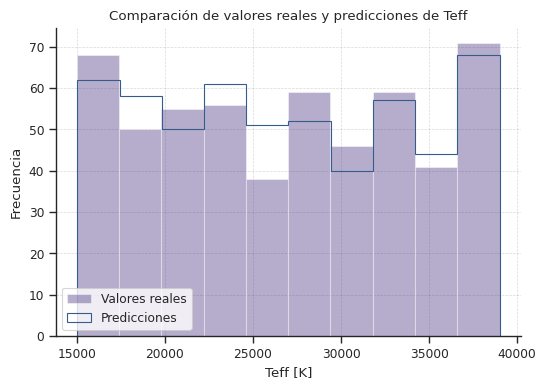

In [18]:
fig, ax = plt.subplots(figsize=(6, 4))
# Histogramas
ax.hist(y_test[:,0], alpha=0.4, label="Valores reales")
ax.hist(y_multirf[:,0], label="Predicciones", histtype='step')

# Detalles del gráfico
ax.set_xlabel('Teff [K]')
ax.set_ylabel('Frecuencia')
ax.set_title('Comparación de valores reales y predicciones de Teff')
ax.legend(loc="lower left")
ax.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.5)
sns.despine()

# Mostrar el gráfico
plt.grid(alpha=0.3, linestyle='--')
plt.show()

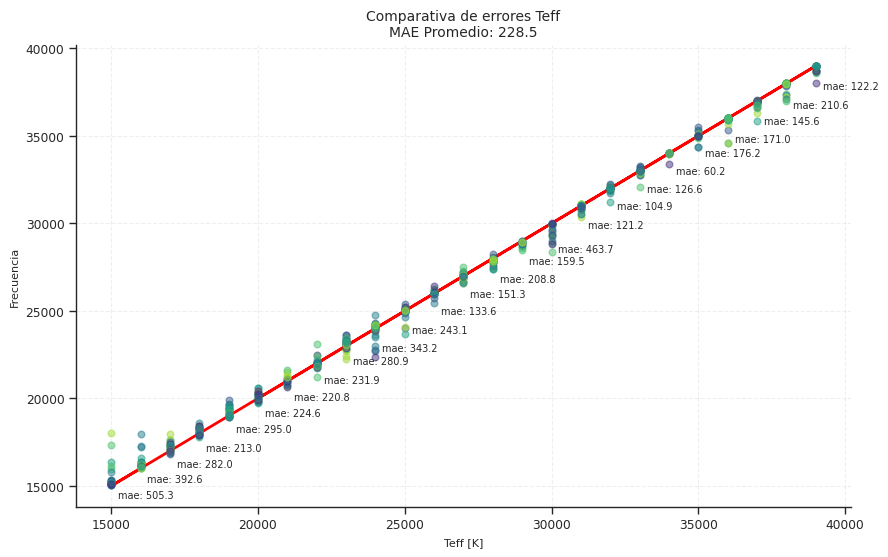

In [19]:
# Obtener valores únicos de la temperatura
temperaturas_unicas = np.unique(y_test[:,0])

# Promedio de MAE para cada temperatura
maes_promedio = []
for temperatura in temperaturas_unicas:
    indice = np.where(y_test[:,0] == temperatura)[0]
    mae_temp = np.mean(np.abs(y_test[indice,0] - y_multirf[indice,0]))
    maes_promedio.append(mae_temp)

# Calcular el MAE total
mae_total = MAE(y_test[:,0], y_multirf[:,0])

# Crear la figura
figura, ax = plt.subplots(figsize=(10, 6))

# Gráfico de puntos con barras de error
for i in range(len(y_test[:,0])):
    ax.errorbar(y_test[i,0], y_multirf[i,0], fmt='o', alpha=0.5, label="Predicciones")

# Agregar el MAE promedio para cada temperatura al gráfico
for i, temperatura in enumerate(temperaturas_unicas):
    indice = np.where(y_test[:,0] == temperatura)[0]
    x = np.mean(y_test[indice,0])
    y = np.mean(y_multirf[indice,0])
    ax.annotate('mae: {:.1f}'.format(maes_promedio[i]), xy=(x, y), xytext=(5, -15), textcoords='offset points', fontsize=7)

ax.plot(y_test[:,0], y_test[:,0], color='red', linewidth='2.0', linestyle='-', label="Valores reales")

# Detalles del gráfico
ax.set_xlabel('Teff [K]', fontsize=8)
ax.set_ylabel('Frecuencia', fontsize=8)
ax.set_title('Comparativa de errores Teff\nMAE Promedio: {:.1f}'.format(mae_total), fontsize=10)
#ejes.legend(loc="best", fontsize=8)
sns.despine()

# Mostrar el gráfico
plt.grid(alpha=0.3, linestyle='--')
plt.show()

### Gravedad superficial (log g)

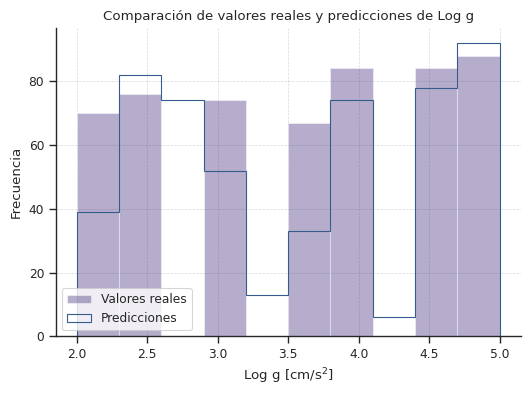

In [20]:
fig, ax = plt.subplots(figsize=(6, 4))
# Histogramas
ax.hist(y_test[:,1], alpha=0.4, label="Valores reales")
ax.hist(y_multirf[:,1], label="Predicciones", histtype='step')

# Detalles del gráfico
ax.set_xlabel('Log g [cm/s$^2$]')
ax.set_ylabel('Frecuencia')
ax.set_title('Comparación de valores reales y predicciones de Log g')
ax.legend(loc="lower left")
ax.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.5)
sns.despine()

# Mostrar el gráfico
plt.grid(alpha=0.3, linestyle='--')
plt.show()

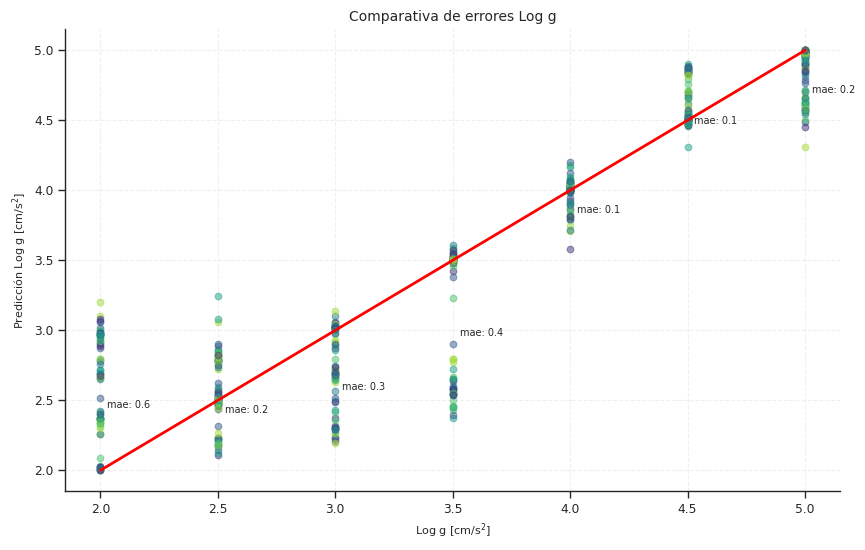

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error as MAE

# Obtener valores únicos de la logg
logg_unico = np.unique(y_test[:, 1])

# Promedio de MAE para cada logg
maes_promedio = []
for logg in logg_unico:
    indice = np.where(y_test[:, 1] == logg)[0]  
    mae_temp = np.mean(np.abs(y_test[indice, 1] - y_multirf[indice, 1]))
    maes_promedio.append(mae_temp)

# Calcular el MAE total
mae_total = MAE(y_test[:, 1], y_multirf[:, 1])  

# Crear la figura
figura, ax = plt.subplots(figsize=(10, 6))

# Gráfico de puntos con barras de error
for i in range(len(y_test[:, 1])):
    ax.scatter(y_test[i, 1], y_multirf[i, 1], alpha=0.5)  

# Agregar el MAE promedio para cada logg al gráfico
for i, logg in enumerate(logg_unico):
    indice = np.where(y_test[:, 1] == logg)[0]  
    x = np.mean(y_test[indice, 1])
    y = np.mean(y_multirf[indice, 1])
    ax.annotate('mae: {:.1f}'.format(maes_promedio[i]), xy=(x, y), xytext=(5, -15), textcoords='offset points', fontsize=7)

ax.plot(y_test[:, 1], y_test[:, 1], color='red', linewidth='2.0', linestyle='-', label="Valores reales")

# Detalles del gráfico
ax.set_xlabel('Log g [cm/s$^2$]', fontsize=8)
ax.set_ylabel('Predicción Log g [cm/s$^2$]', fontsize=8)
ax.set_title('Comparativa de errores Log g', fontsize=10)

sns.despine()

# Mostrar el gráfico
plt.grid(alpha=0.3, linestyle='--')
plt.show()


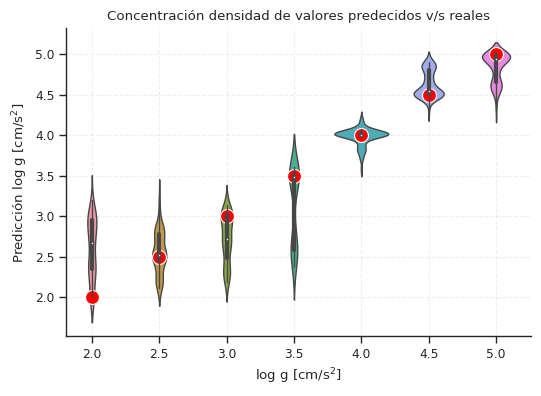

In [22]:
fig, ax = plt.subplots(figsize=(6, 4))
# Gráfico de violín
sns.violinplot(x=y_test[:,1], y=y_multirf[:,1], linewidth=1, ax=ax)
sns.scatterplot(data=np.unique(y_test[:,1]), color='red', s=100, marker="o", ax=ax)

# Detalles del gráfico
ax.set_title('Concentración densidad de valores predecidos v/s reales')
ax.set_xlabel('log g [cm/s$^2$]')
ax.set_ylabel('Predicción log g [cm/s$^2$]')
sns.despine()

# Mostrar el gráfico
plt.grid(alpha=0.3, linestyle='--')
plt.show()

### Velocidad de rotación (Vrot)

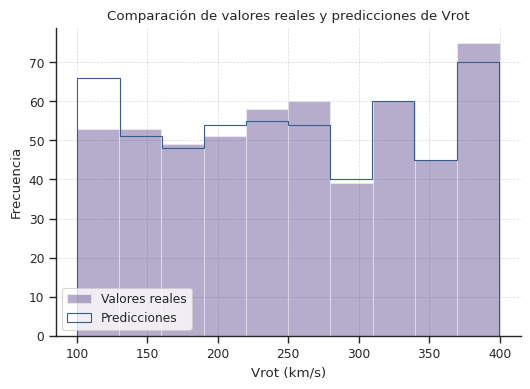

In [23]:
fig, ax = plt.subplots(figsize=(6, 4))
# Histogramas
ax.hist(y_test[:,2], alpha=0.4, label="Valores reales")
ax.hist(y_multirf[:,2], label="Predicciones", histtype='step')

# Detalles del gráfico
ax.set_xlabel('Vrot (km/s)')
ax.set_ylabel('Frecuencia')
ax.set_title('Comparación de valores reales y predicciones de Vrot')
ax.legend(loc="lower left")
ax.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.5)
sns.despine()

# Mostrar el gráfico
plt.grid(alpha=0.3, linestyle='--')
plt.show()

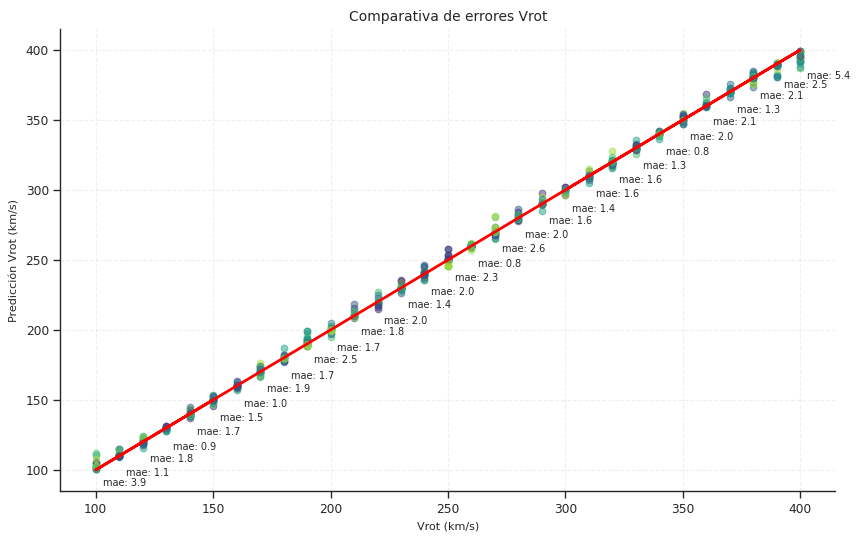

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error as MAE

# Obtener valores únicos de la vrot
vrot_unico = np.unique(y_test[:, 2])

# Promedio de MAE para cada vrot
maes_promedio = []
for logg in vrot_unico:
    indice = np.where(y_test[:, 2] == logg)[0]  
    mae_temp = np.mean(np.abs(y_test[indice, 2] - y_multirf[indice, 2]))
    maes_promedio.append(mae_temp)

# Calcular el MAE total
mae_total = MAE(y_test[:, 2], y_multirf[:, 2]) 

# Crear la figura
figura, ax = plt.subplots(figsize=(10, 6))

# Gráfico de puntos con barras de error
for i in range(len(y_test[:, 2])):
    ax.scatter(y_test[i, 2], y_multirf[i, 2], alpha=0.5)  

# Agregar el MAE promedio para cada vrot al gráfico
for i, logg in enumerate(vrot_unico):
    indice = np.where(y_test[:, 2] == logg)[0]  
    x = np.mean(y_test[indice, 2])
    y = np.mean(y_multirf[indice, 2])
    ax.annotate('mae: {:.1f}'.format(maes_promedio[i]), xy=(x, y), xytext=(5, -15), textcoords='offset points', fontsize=7)

ax.plot(y_test[:, 2], y_test[:, 2], color='red', linewidth='2.0', linestyle='-', label="Valores reales")

# Detalles del gráfico
ax.set_xlabel('Vrot (km/s)', fontsize=8)
ax.set_ylabel('Predicción Vrot (km/s)', fontsize=8)
ax.set_title('Comparativa de errores Vrot', fontsize=10)

sns.despine()

# Mostrar el gráfico
plt.grid(alpha=0.3, linestyle='--')
plt.show()


### Prueba robustez de modelo

Archivos del conjunto de Validación:
        Nombre de archivo
0    f_t15000g20v140.dat
1    f_t15000g20v370.dat
2    f_t15000g25v130.dat
3    f_t15000g25v160.dat
4    f_t15000g25v310.dat
..                   ...
538  f_t39000g40v210.dat
539  f_t39000g40v400.dat
540  f_t39000g45v250.dat
541  f_t39000g45v310.dat
542  f_t39000g50v100.dat

[543 rows x 1 columns]
Archivos del conjunto de Validación seleccionados:
 ['f_t15000g20v370.dat', 'f_t20000g25v210.dat', 'f_t25000g30v380.dat', 'f_t30000g35v140.dat', 'f_t35000g40v220.dat', 'f_t39000g50v100.dat']
Predicción a la línea con ruido
Teff: 15244.3
Log(g): 2.0
Vrot: 374.5


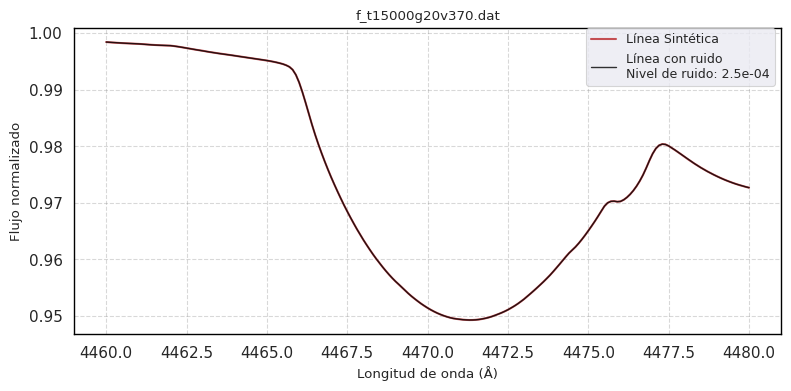

Predicción a la línea con ruido
Teff: 15266.0
Log(g): 2.0
Vrot: 374.5


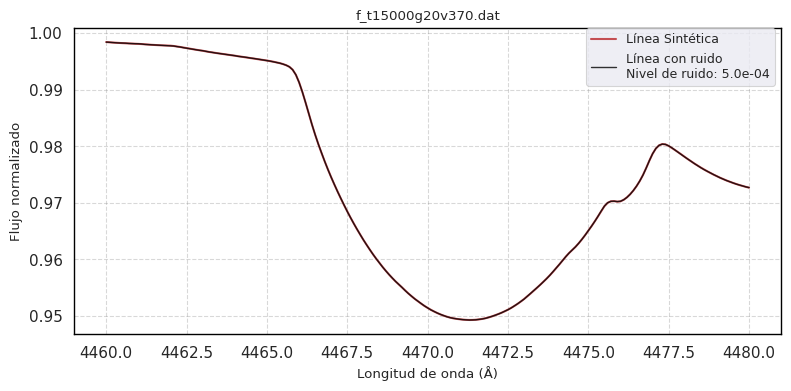

Predicción a la línea con ruido
Teff: 15432.7
Log(g): 2.0
Vrot: 374.5


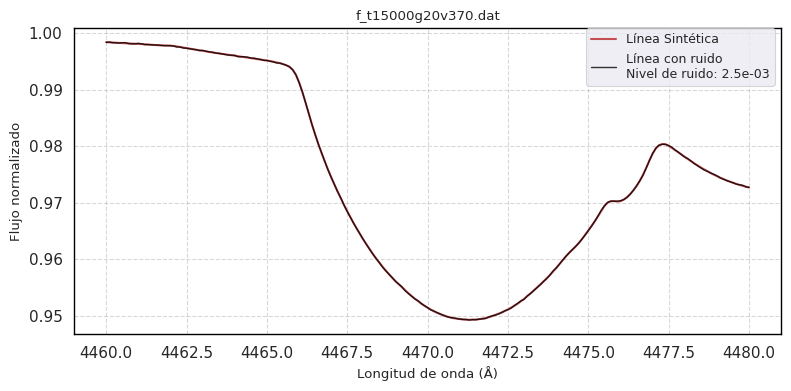

Predicción a la línea con ruido
Teff: 15427.9
Log(g): 2.0
Vrot: 374.5


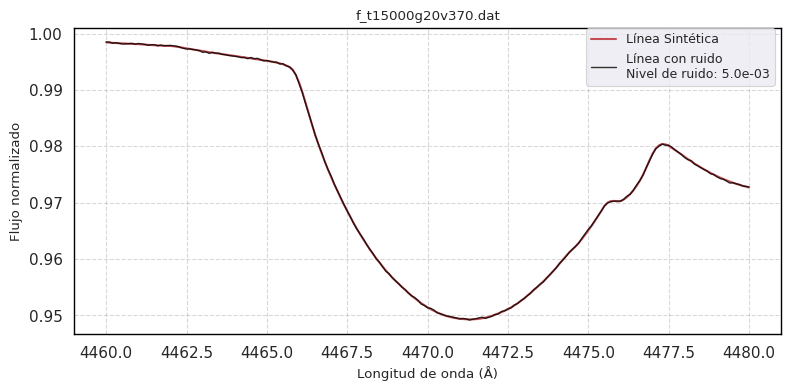

Predicción a la línea con ruido
Teff: 18367.5
Log(g): 2.1
Vrot: 374.7


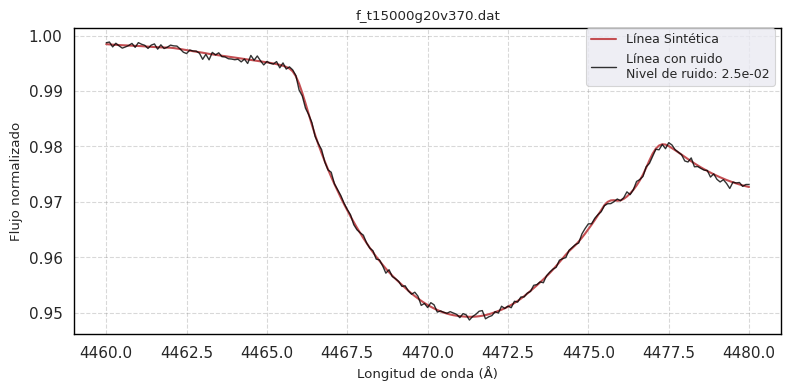

Predicción a la línea con ruido
Teff: 18423.1
Log(g): 2.2
Vrot: 375.0


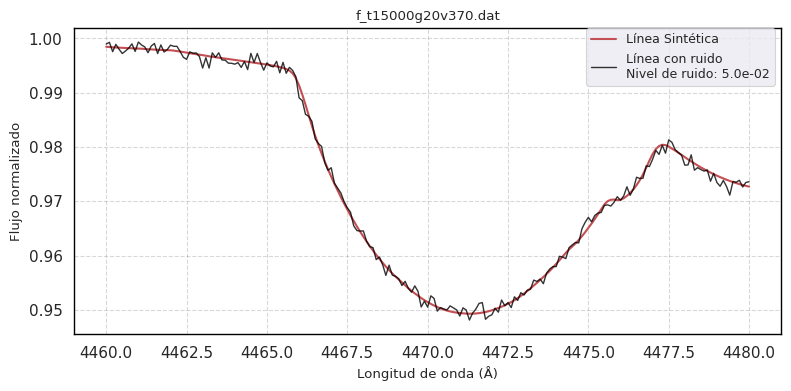

Predicción a la línea con ruido
Teff: 21142.5
Log(g): 2.5
Vrot: 367.7


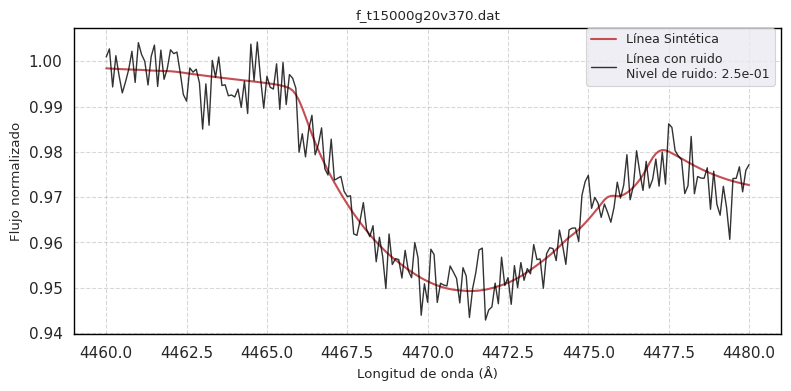

Predicción a la línea con ruido
Teff: 23019.3
Log(g): 2.7
Vrot: 360.1


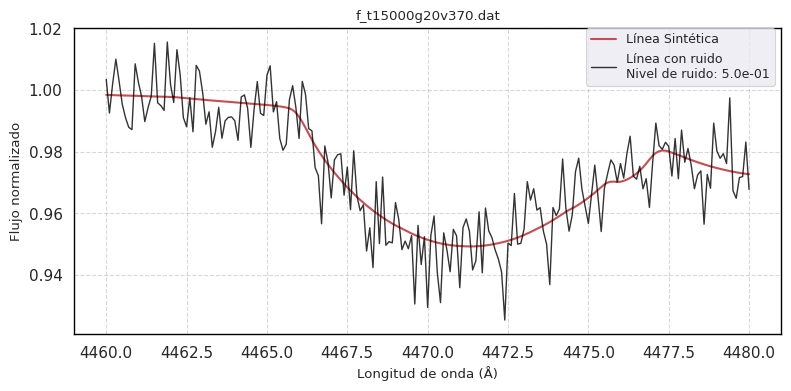

Predicción a la línea con ruido
Teff: 20084.5
Log(g): 2.2
Vrot: 211.1


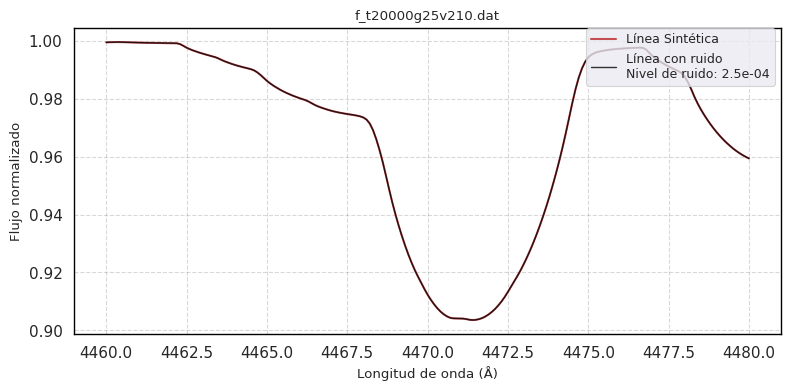

Predicción a la línea con ruido
Teff: 20087.0
Log(g): 2.2
Vrot: 211.1


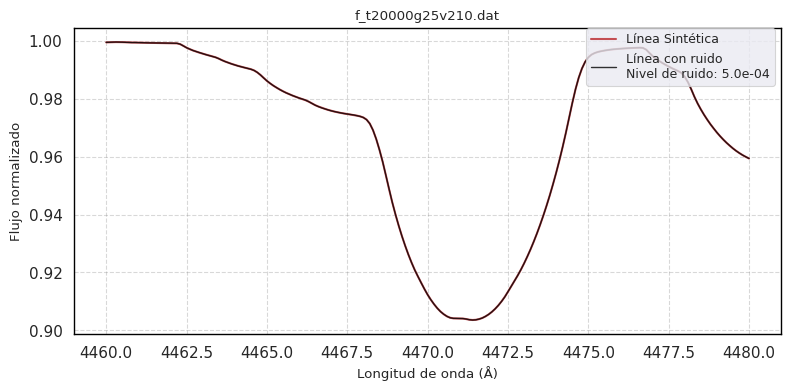

Predicción a la línea con ruido
Teff: 20111.1
Log(g): 2.2
Vrot: 211.3


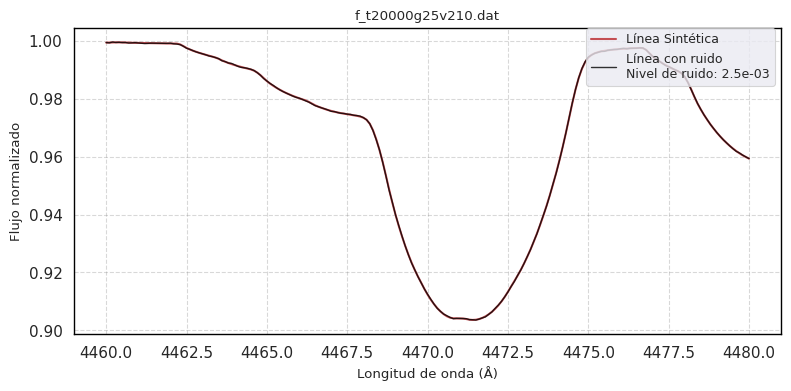

Predicción a la línea con ruido
Teff: 20111.1
Log(g): 2.2
Vrot: 211.6


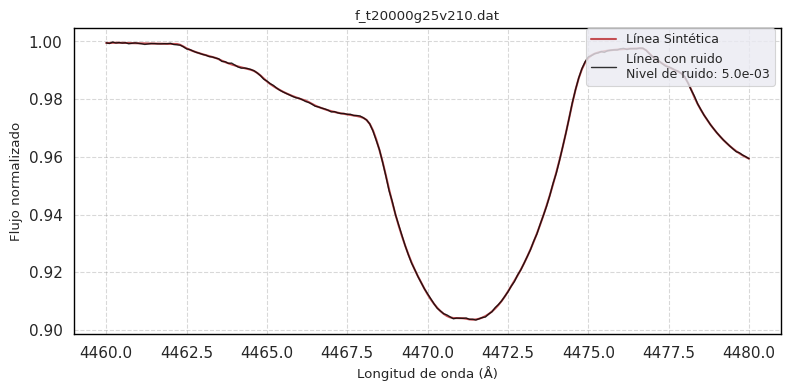

Predicción a la línea con ruido
Teff: 20231.9
Log(g): 2.3
Vrot: 211.8


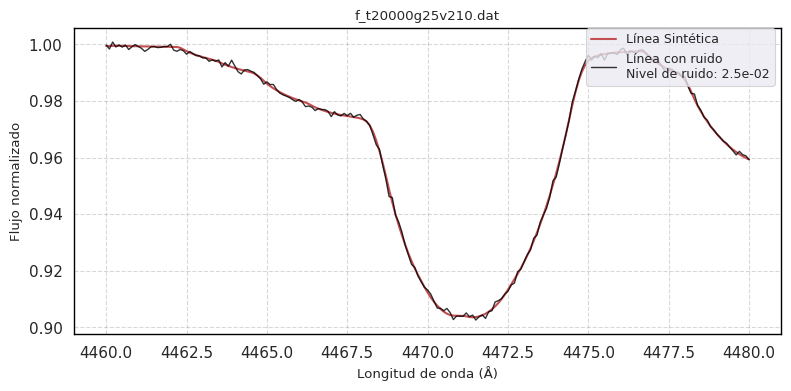

Predicción a la línea con ruido
Teff: 20311.6
Log(g): 2.3
Vrot: 214.6


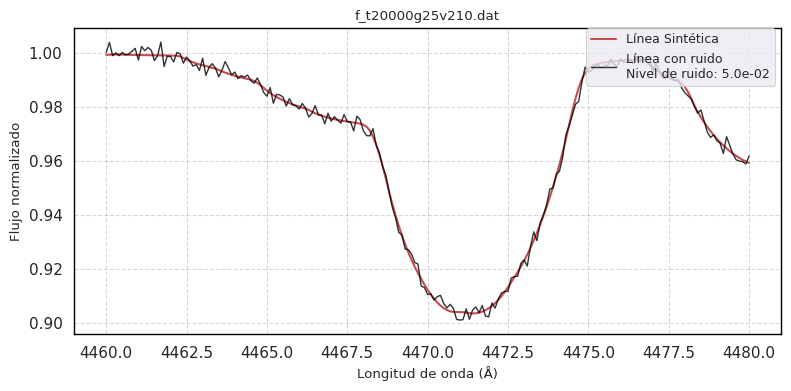

Predicción a la línea con ruido
Teff: 22066.4
Log(g): 2.8
Vrot: 236.5


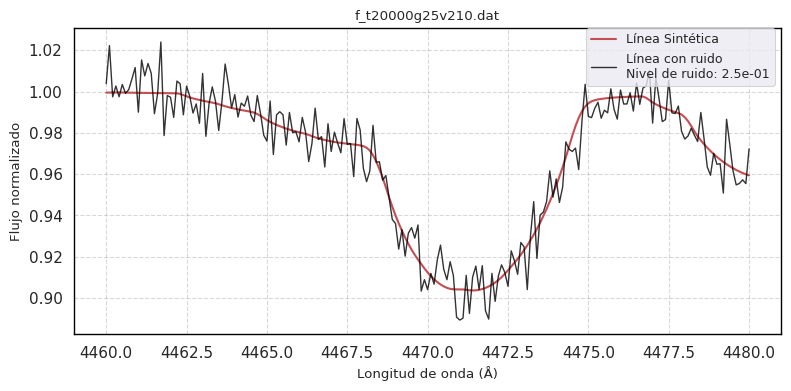

Predicción a la línea con ruido
Teff: 23374.4
Log(g): 3.1
Vrot: 246.4


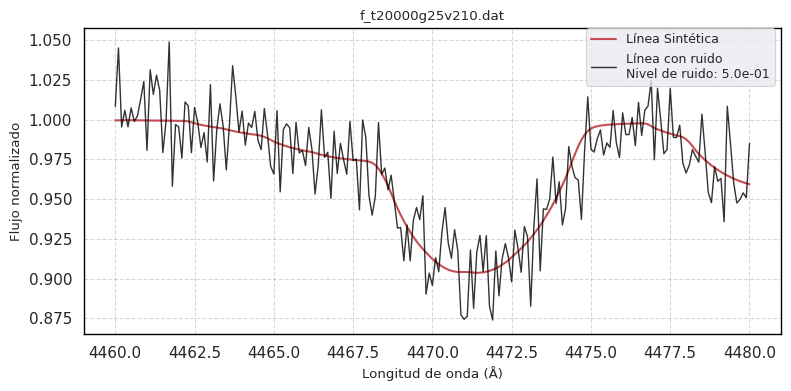

Predicción a la línea con ruido
Teff: 25083.8
Log(g): 2.3
Vrot: 380.3


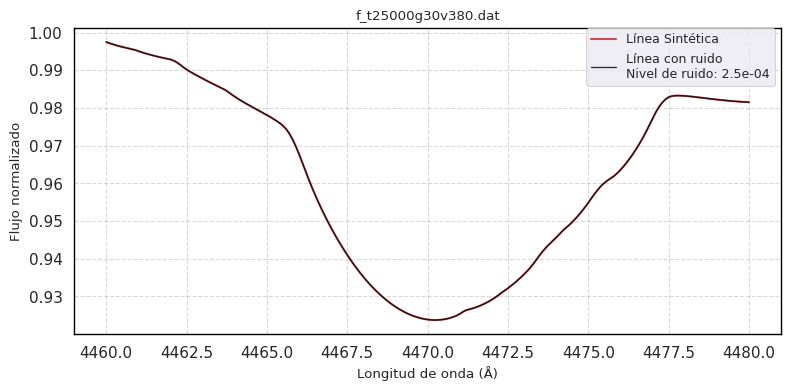

Predicción a la línea con ruido
Teff: 25086.2
Log(g): 2.3
Vrot: 380.4


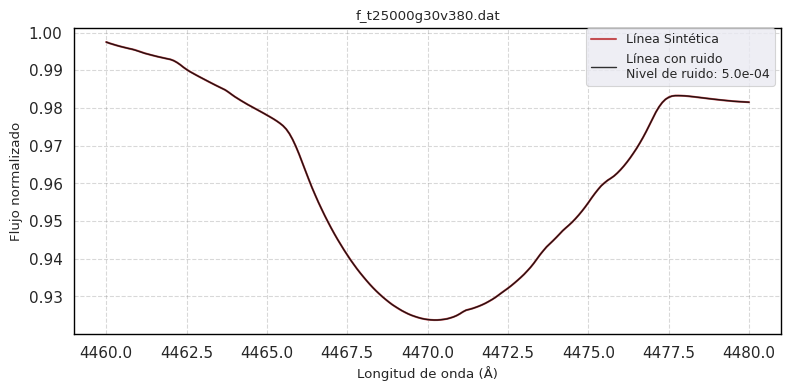

Predicción a la línea con ruido
Teff: 25102.3
Log(g): 2.3
Vrot: 380.4


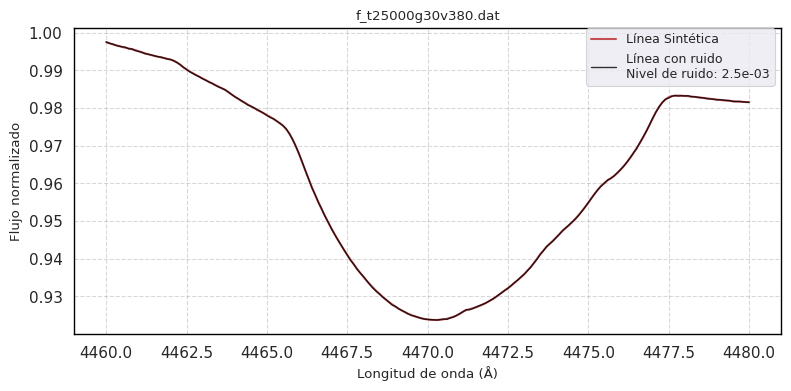

Predicción a la línea con ruido
Teff: 25096.6
Log(g): 2.4
Vrot: 380.7


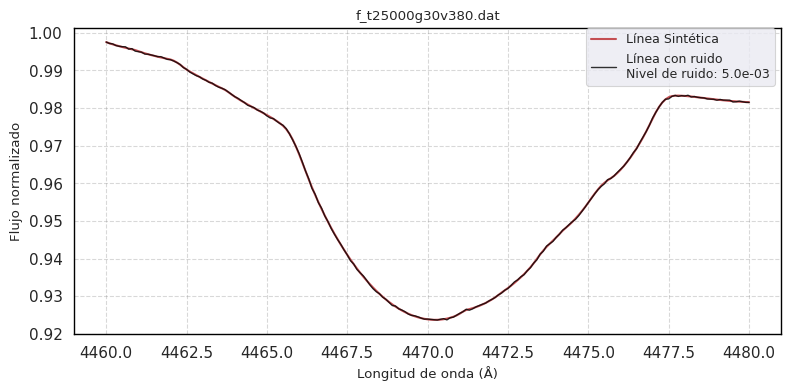

Predicción a la línea con ruido
Teff: 24992.5
Log(g): 2.5
Vrot: 380.8


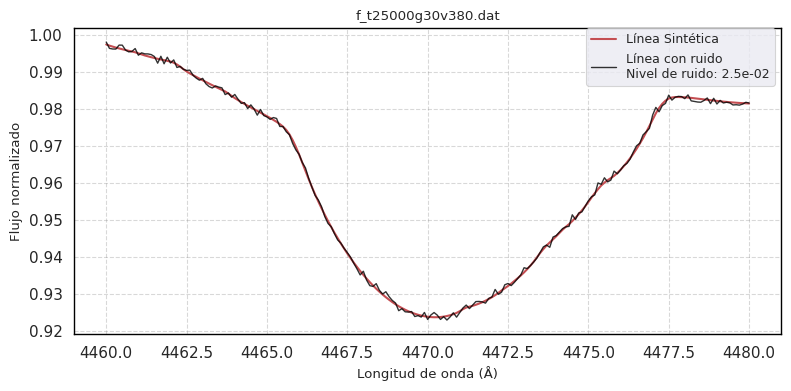

Predicción a la línea con ruido
Teff: 24882.6
Log(g): 2.6
Vrot: 379.4


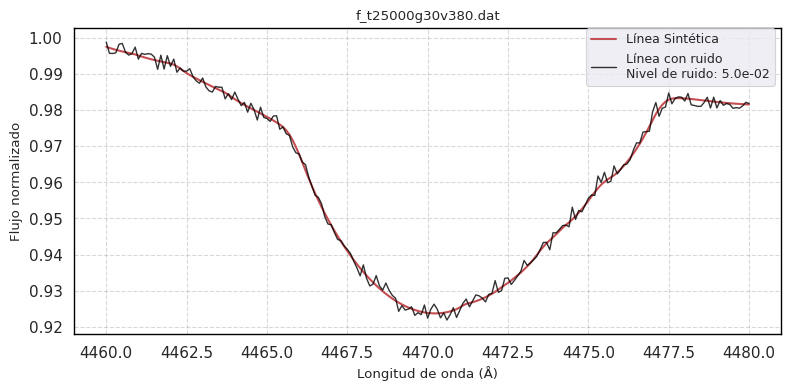

Predicción a la línea con ruido
Teff: 25292.1
Log(g): 2.9
Vrot: 373.8


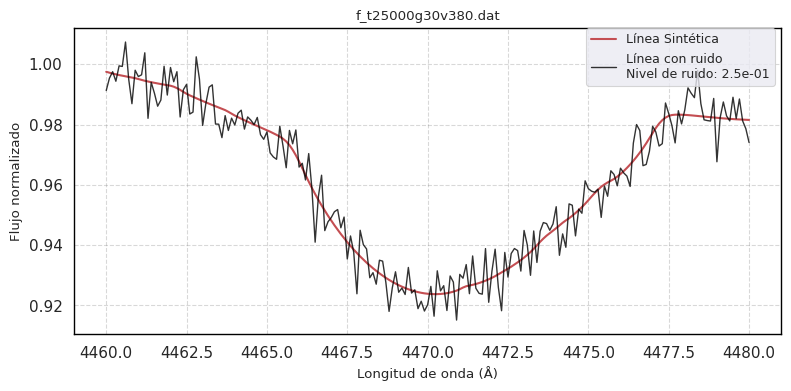

Predicción a la línea con ruido
Teff: 24726.6
Log(g): 3.0
Vrot: 361.0


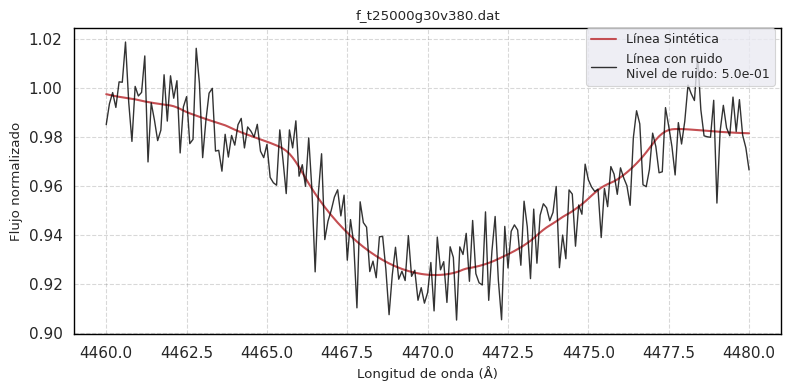

Predicción a la línea con ruido
Teff: 28896.7
Log(g): 3.3
Vrot: 139.6


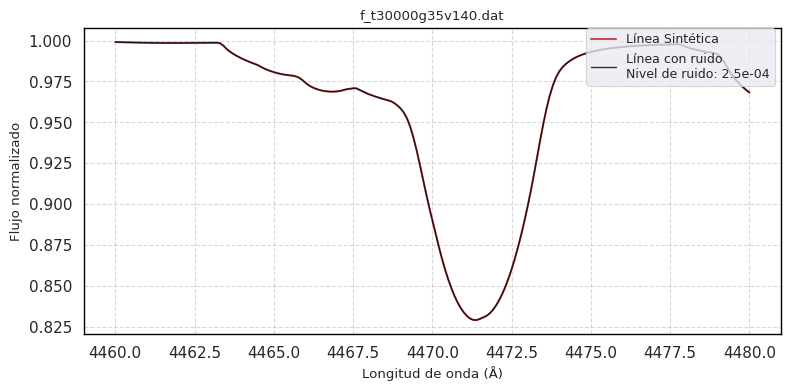

Predicción a la línea con ruido
Teff: 28911.2
Log(g): 3.3
Vrot: 139.7


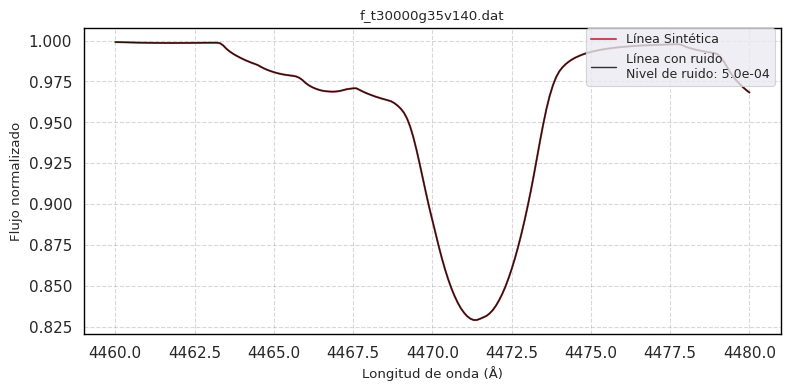

Predicción a la línea con ruido
Teff: 28873.3
Log(g): 3.3
Vrot: 139.6


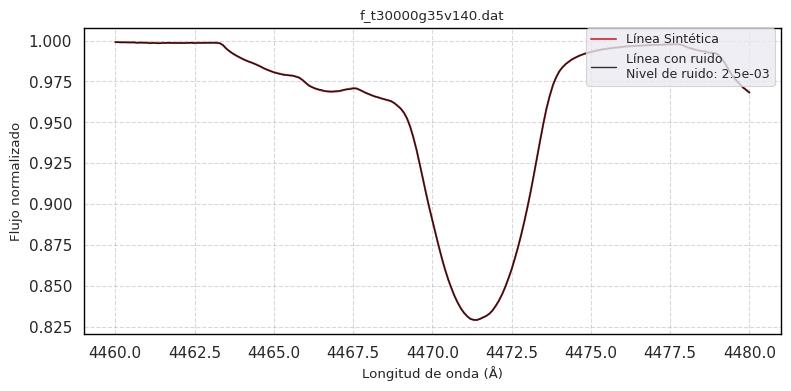

Predicción a la línea con ruido
Teff: 28803.0
Log(g): 3.3
Vrot: 139.5


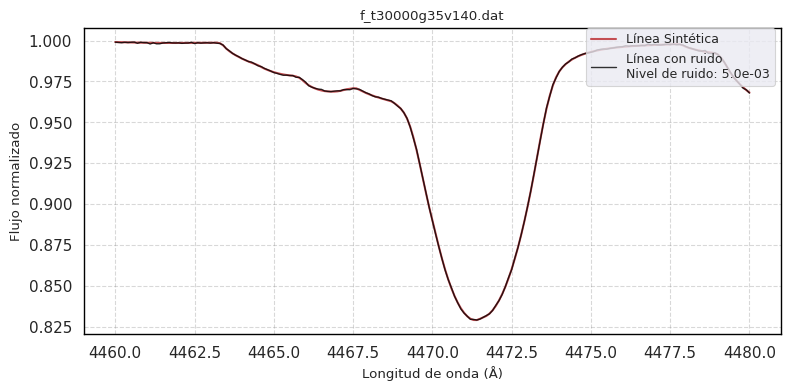

Predicción a la línea con ruido
Teff: 28049.1
Log(g): 3.3
Vrot: 138.2


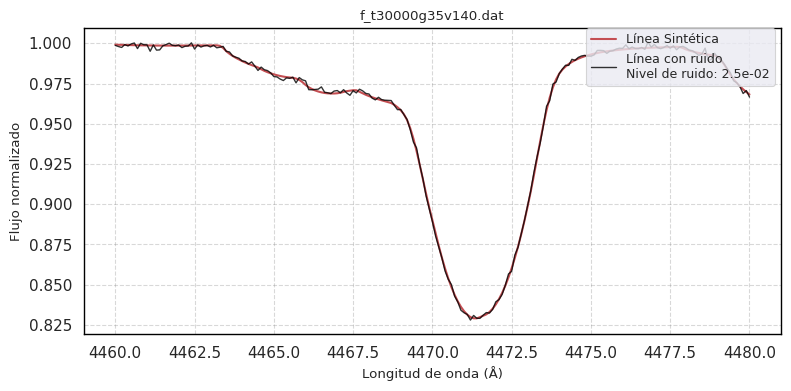

Predicción a la línea con ruido
Teff: 27889.5
Log(g): 3.5
Vrot: 139.5


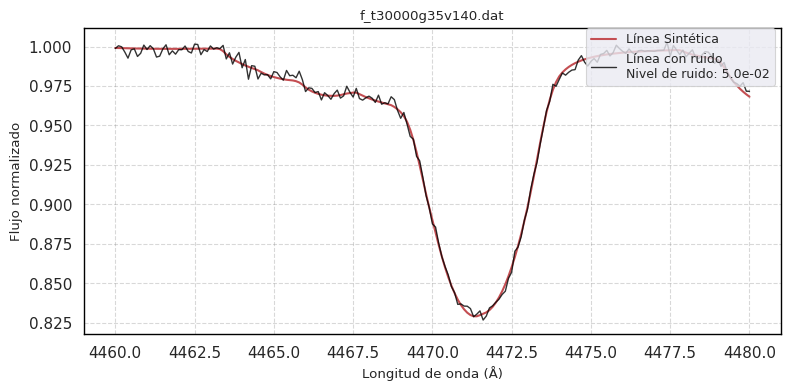

Predicción a la línea con ruido
Teff: 27216.4
Log(g): 3.7
Vrot: 144.6


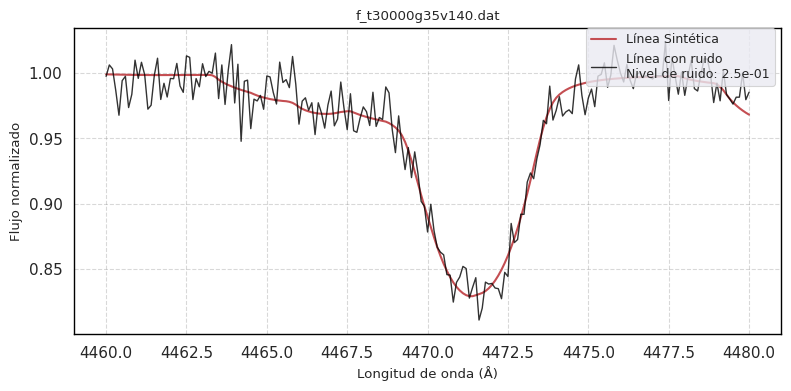

Predicción a la línea con ruido
Teff: 27760.9
Log(g): 3.9
Vrot: 160.0


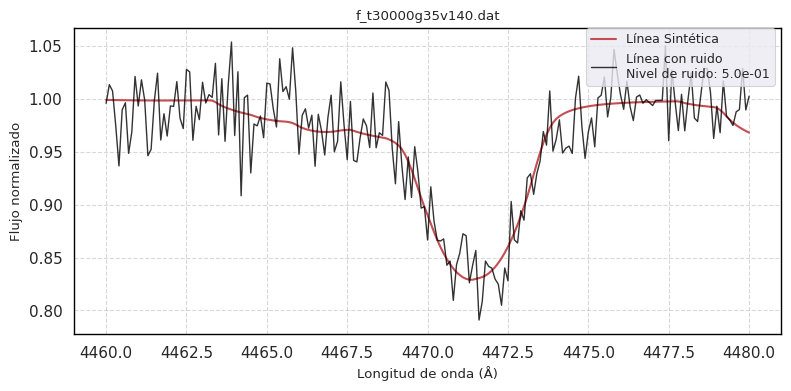

Predicción a la línea con ruido
Teff: 35115.7
Log(g): 4.1
Vrot: 218.7


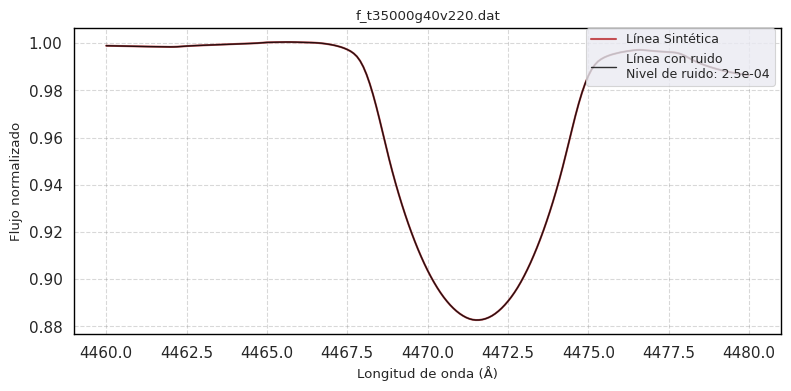

Predicción a la línea con ruido
Teff: 35149.5
Log(g): 4.0
Vrot: 218.7


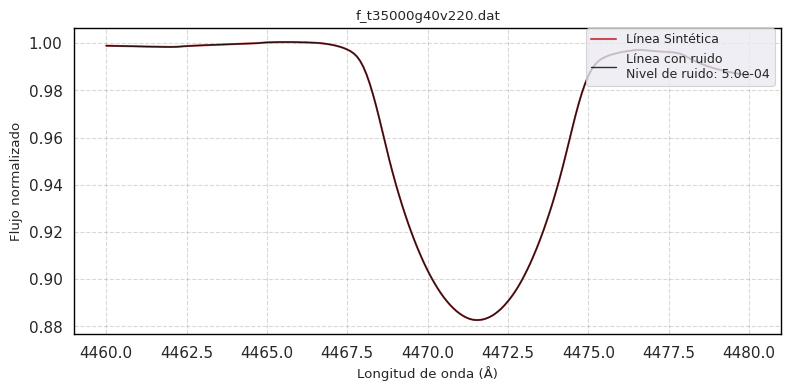

Predicción a la línea con ruido
Teff: 35036.0
Log(g): 3.9
Vrot: 218.7


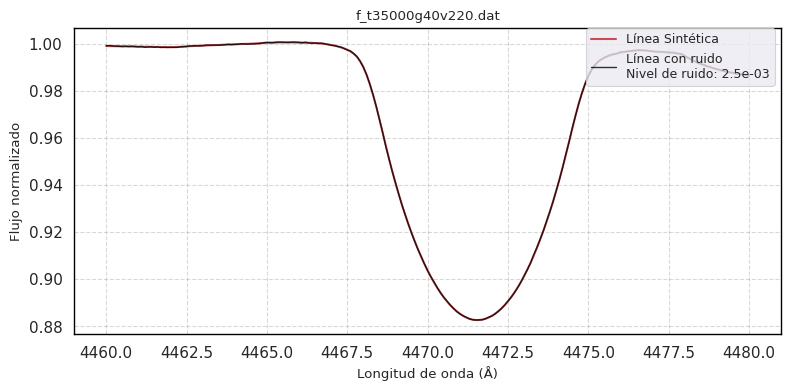

Predicción a la línea con ruido
Teff: 35086.6
Log(g): 3.8
Vrot: 218.3


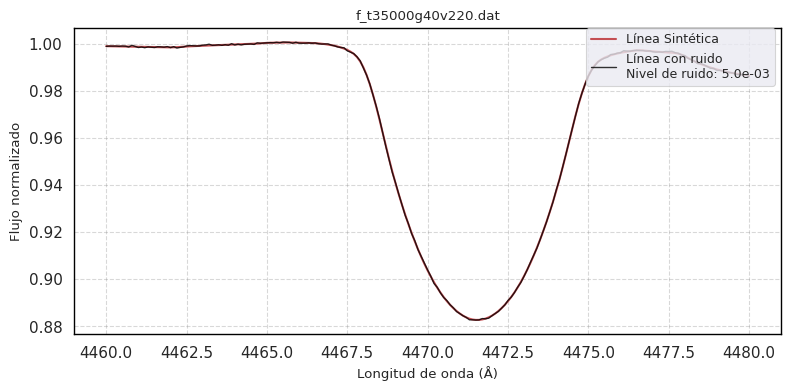

Predicción a la línea con ruido
Teff: 34978.3
Log(g): 3.6
Vrot: 218.3


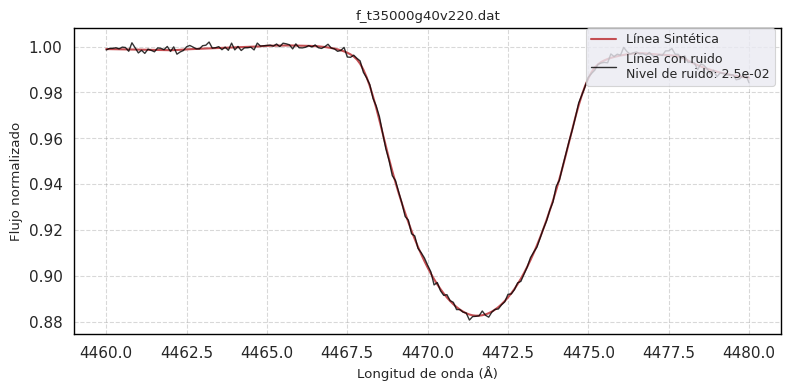

Predicción a la línea con ruido
Teff: 35345.4
Log(g): 3.6
Vrot: 218.3


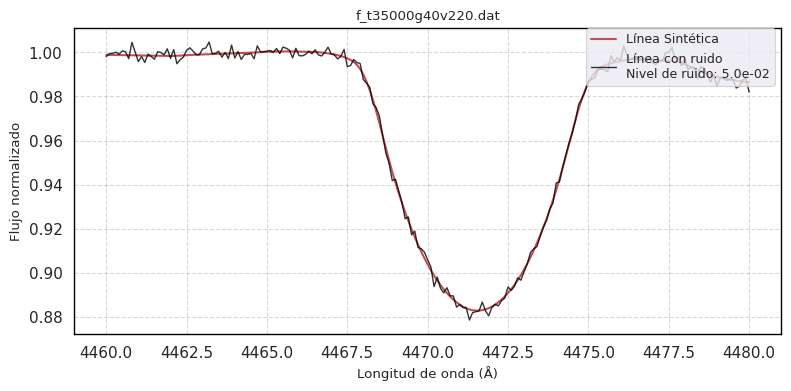

Predicción a la línea con ruido
Teff: 32017.3
Log(g): 3.7
Vrot: 225.7


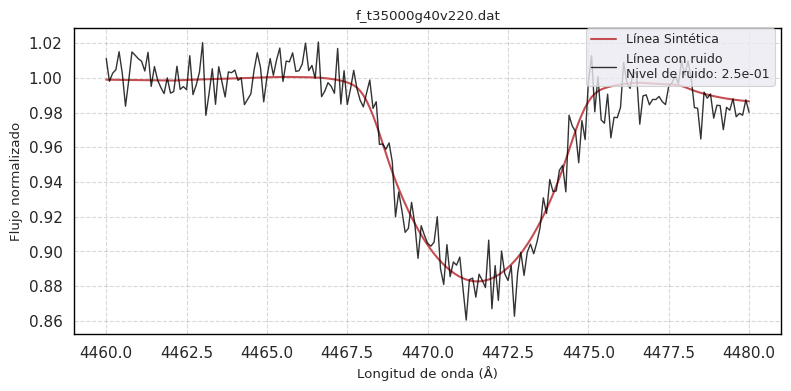

Predicción a la línea con ruido
Teff: 28758.1
Log(g): 3.7
Vrot: 241.1


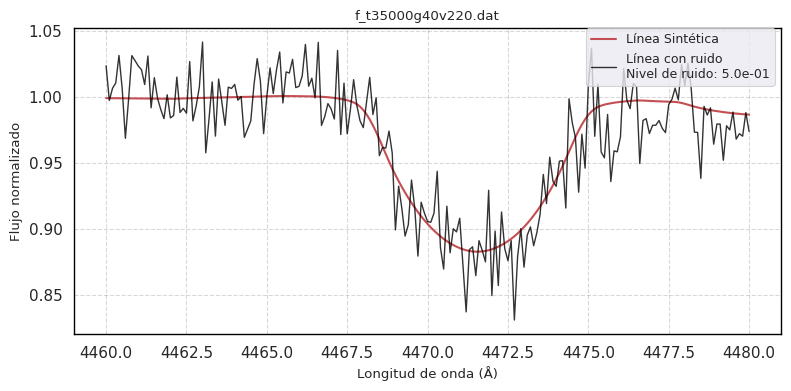

Predicción a la línea con ruido
Teff: 37944.4
Log(g): 4.4
Vrot: 101.6


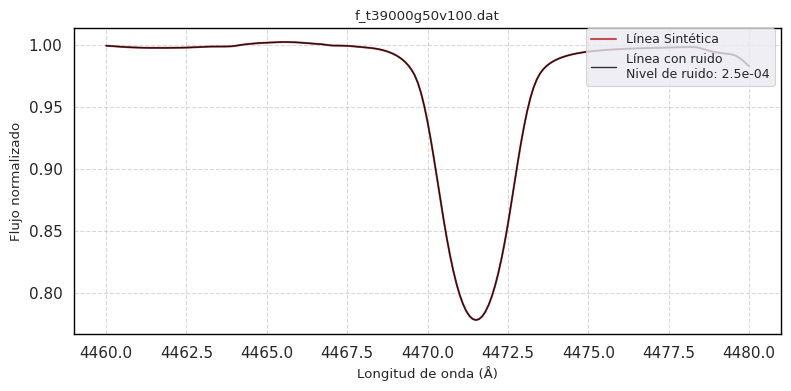

Predicción a la línea con ruido
Teff: 37850.2
Log(g): 4.4
Vrot: 101.7


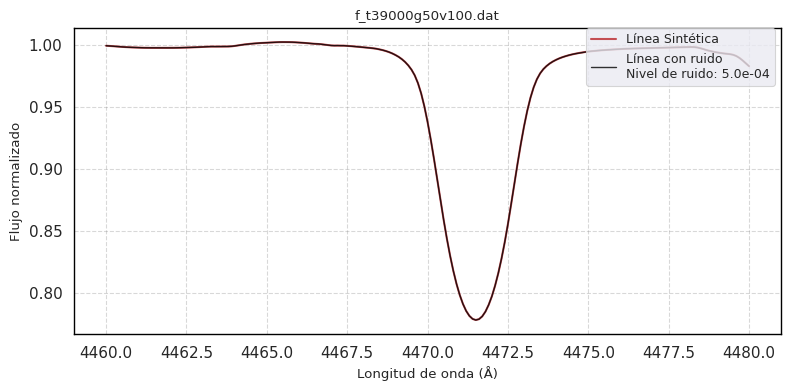

Predicción a la línea con ruido
Teff: 37241.5
Log(g): 4.3
Vrot: 101.9


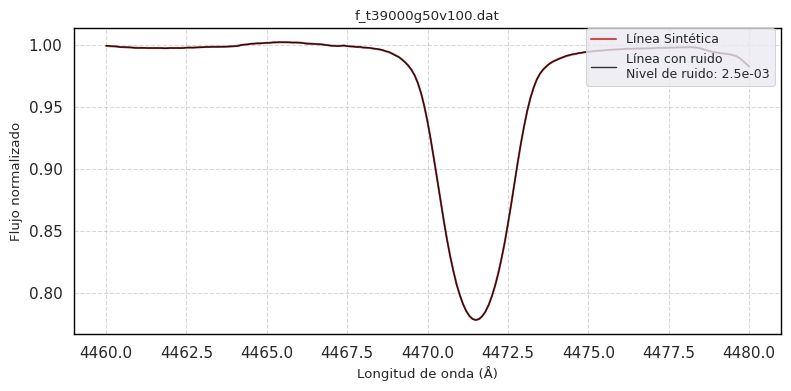

Predicción a la línea con ruido
Teff: 36804.3
Log(g): 4.2
Vrot: 102.5


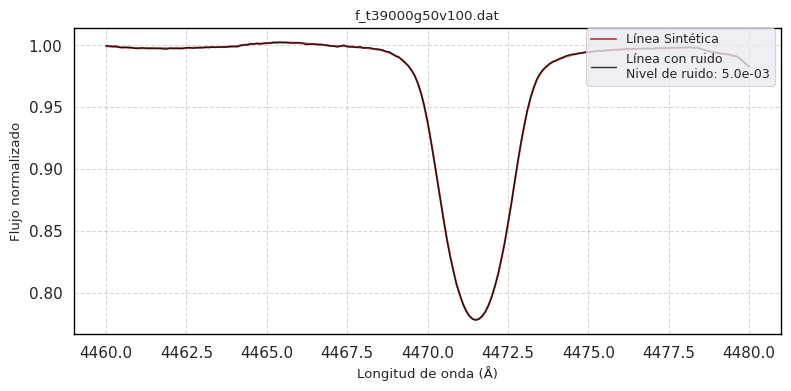

Predicción a la línea con ruido
Teff: 34882.2
Log(g): 3.8
Vrot: 105.1


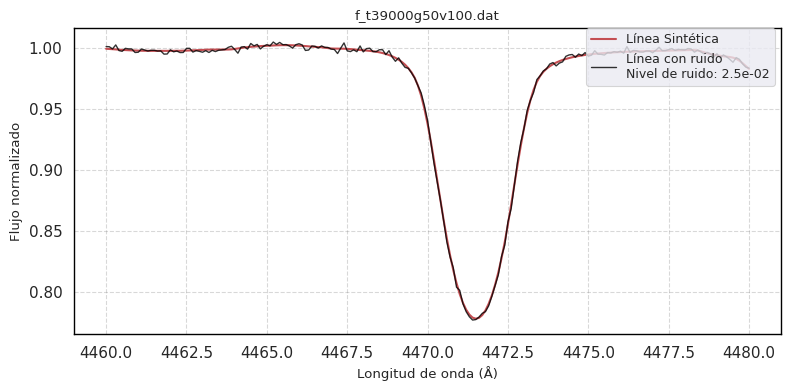

Predicción a la línea con ruido
Teff: 33456.5
Log(g): 3.7
Vrot: 105.5


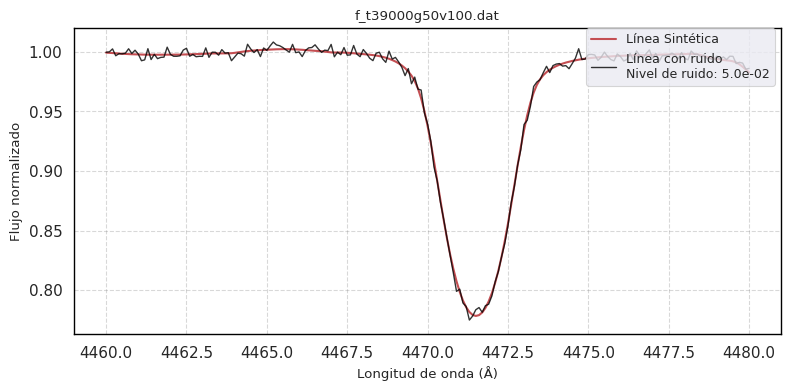

Predicción a la línea con ruido
Teff: 29676.5
Log(g): 3.4
Vrot: 110.5


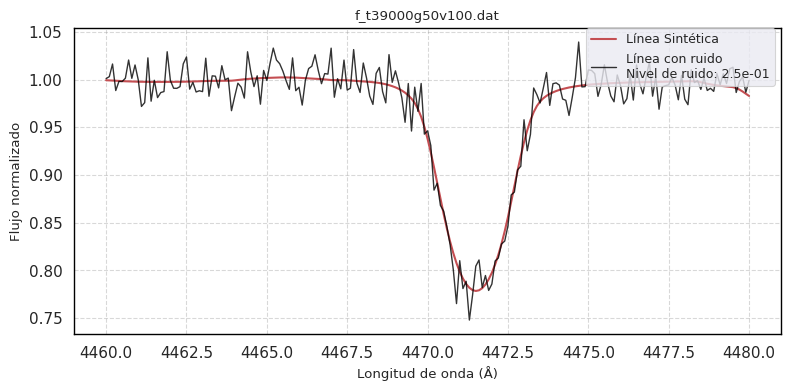

Predicción a la línea con ruido
Teff: 29841.9
Log(g): 3.5
Vrot: 124.7


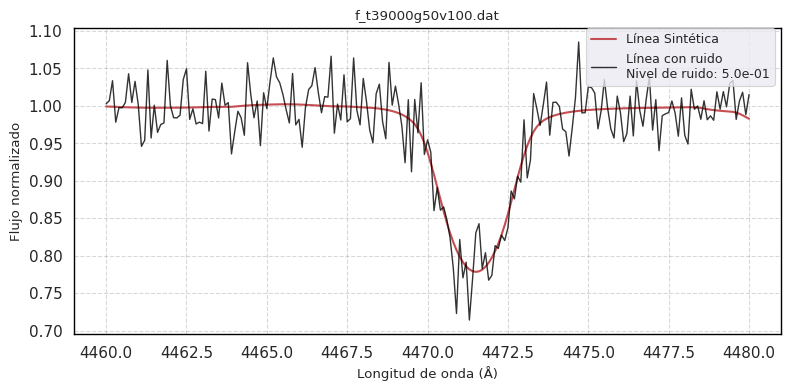

Ruido      Teff Prediccion_Teff Error_Teff Log_g Prediccion_Logg   
0   0.00e+00  15000.00        15244.31       1.63  2.00            2.02  \
1   0.00e+00  15000.00        15266.05       1.77  2.00            2.02   
2   0.00e+00  15000.00        15432.71       2.88  2.00            2.04   
3   1.00e-02  15000.00        15427.88       2.85  2.00            2.01   
4   3.00e-02  15000.00        18367.49      22.45  2.00            2.11   
5   5.00e-02  15000.00        18423.05      22.82  2.00            2.20   
6   2.50e-01  15000.00        21142.51      40.95  2.00            2.46   
7   5.00e-01  15000.00        23019.32      53.46  2.00            2.65   
8   0.00e+00  20000.00        20084.54       0.42  2.50            2.17   
9   0.00e+00  20000.00        20086.96       0.43  2.50            2.17   
10  0.00e+00  20000.00        20111.11       0.56  2.50            2.18   
11  1.00e-02  20000.00        20111.11       0.56  2.50            2.19   
12  3.00e-02  20000.00        20231.88       1.16  2.50            2.29   
13  5.00e-02  20000.00        20311.59       1.56  2.50            2.29   
14  2.50e-01  20000.00        22066.43      10.33  2.50            2.78   
15  5.00e-01  20000.00        23374.40      16.87  2.50            3.06   
16  0.00e+00  25000.00        25083.81       0.34  3.00            2.30   
17  0.00e+00  25000.00        25086.23       0.34  3.00            2.30   
18  0.00e+00  25000.00        25102.34       0.41  3.00            2.32   
19  1.00e-02  25000.00        25096.58       0.39  3.00            2.37   
20  3.00e-02  25000.00        24992.47       0.03  3.00            2.51   
21  5.00e-02  25000.00        24882.57       0.47  3.00            2.59   
22  2.50e-01  25000.00        25292.07       1.17  3.00            2.91   
23  5.00e-01  25000.00        24726.62       1.09  3.00            3.03   
24  0.00e+00  30000.00        28896.74       3.68  3.50            3.28   
25  0.00e+00  30000.00        28911.24       3.63  3.50            3.28   
26  0.00e+00  30000.00        28873.31       3.76  3.50            3.26   
27  1.00e-02  30000.00        28803.03       3.99  3.50            3.28   
28  3.00e-02  30000.00        28049.11       6.50  3.50            3.33   
29  5.00e-02  30000.00        27889.50       7.03  3.50            3.51   
30  2.50e-01  30000.00        27216.42       9.28  3.50            3.73   
31  5.00e-01  30000.00        27760.87       7.46  3.50            3.94   
32  0.00e+00  35000.00        35115.73       0.33  4.00            4.05   
33  0.00e+00  35000.00        35149.54       0.43  4.00            4.05   
34  0.00e+00  35000.00        35036.02       0.10  4.00            3.88   
35  1.00e-02  35000.00        35086.55       0.25  4.00            3.84   
36  3.00e-02  35000.00        34978.26       0.06  4.00            3.63   
37  5.00e-02  35000.00        35345.41       0.99  4.00            3.60   
38  2.50e-01  35000.00        32017.29       8.52  4.00            3.67   
39  5.00e-01  35000.00        28758.11      17.83  4.00            3.74   
40  0.00e+00  39000.00        37944.44       2.71  5.00            4.40   
41  0.00e+00  39000.00        37850.24       2.95  5.00            4.39   
42  0.00e+00  39000.00        37241.55       4.51  5.00            4.30   
43  1.00e-02  39000.00        36804.25       5.63  5.00            4.21   
44  3.00e-02  39000.00        34882.19      10.56  5.00            3.83   
45  5.00e-02  39000.00        33456.52      14.21  5.00            3.67   
46  2.50e-01  39000.00        29676.46      23.91  5.00            3.40   
47  5.00e-01  39000.00        29841.92      23.48  5.00            3.48   

   Error_Log_g    Vrot Prediccion_Vrot Error_Vrot  
0         1.16  370.00          374.48       1.21  
1         1.18  370.00          374.45       1.20  
2         1.81  370.00          374.50       1.22  
3         0.44  370.00          374.55       1.23  
4         5.50  370.00          374.75       1.28  
5         9.95  370

In [25]:
def obtener_archivos():
    nombres_archivos = []  # Lista para almacenar los nombres de los archivos encontrados

    # Ordenar las muestras por temperatura, logg y vrot de menor a mayor
    sorted_indices = np.lexsort((y_val[:, 2], y_val[:, 1], y_val[:, 0]))
    sorted_muestras = y_val[sorted_indices]

    for muestra in sorted_muestras:
        t_eff = muestra[0]
        logg = muestra[1]
        vrot = muestra[2]

        t_str = str(int(round(t_eff))).zfill(5)
        logg_str = str(int(round(logg * 10))).zfill(2)
        vrot_str = str(int(round(vrot))).zfill(3)
        nombre_archivo = f"f_t{t_str}g{logg_str}v{vrot_str}.dat"

        nombres_archivos.append(nombre_archivo)

    # Crear un DataFrame a partir de la lista de nombres de archivo
    df_archivos = pd.DataFrame({'Nombre de archivo': nombres_archivos})

    return df_archivos

def obtener_archivos_validacion():
    nombres_archivos = []  # Lista para almacenar los nombres de los archivos encontrados
    temperaturas = set()  # Conjunto para almacenar las temperaturas únicas

    for muestra in y_val:
        t_eff = muestra[0]
        logg = muestra[1]
        vrot = muestra[2]

        t_str = str(int(round(t_eff))).zfill(5)
        logg_str = str(int(round(logg * 10))).zfill(2)
        vrot_str = str(int(round(vrot))).zfill(3)
        nombre_archivo = f"f_t{t_str}g{logg_str}v{vrot_str}.dat"

        # Verificar si el nombre del archivo cumple con los patrones específicos
        if (
            (t_str == '15000' and logg_str == '20' and vrot >= 100)
            or (t_str == '20000' and logg_str == '25' and vrot >= 100)
            or (t_str == '25000' and logg_str == '30' and vrot >= 100)
            or (t_str == '30000' and logg_str == '35' and vrot >= 100)
            or (t_str == '35000' and logg_str == '40' and vrot <= 400)
            or (t_str == '39000' and logg_str == '50' and vrot <= 400)
        ):
            if t_eff not in temperaturas:
                nombres_archivos.append(nombre_archivo)
                temperaturas.add(t_eff)
    nombres_archivos.sort()
    return nombres_archivos


def string2params(string, show=True):
    # Separamos la cadena en tres partes usando "g" y "v" como delimitadores
    s1 = string.partition("g")
    t = s1[0][1:] # Extraemos el valor de la temperatura a partir de la primera parte de la cadena
    s2 = s1[2].partition("v")
    g = s2[0] # Extraemos el valor de la gravedad superficial a partir de la segunda parte de la cadena
    v = s2[-1] # Extraemos el valor de la velocidad de rotación a partir de la tercera parte de la cadena
    return float(t), float(g)/10, float(v) # Devolvemos los valores de temperatura, gravedad superficial y velocidad de rotación en una tupla

def dif_porcentual(v_real, v_ruido):
    '''
    Entrega el % de error entre los valores reales y los ruidos
    utilizando la diferencia porcentual
    '''
    return abs(((v_ruido - v_real) / v_real) * 100)


# Configuración de gráficos
sns.set_style('ticks')
sns.set_palette('viridis')
sns.set_context('paper')

# Directorio de los modelos
carpeta_modelos = '../filtered_wv_models/'

# Niveles de ruido
niveles_ruido = [2.5e-4,5e-4,2.5e-3, 5e-3,2.5e-2, 5e-2,2.5e-1, 5e-1]

# Temperaturas de los modelos
teffs = [15000, 20000, 25000, 30000, 35000,39000]
# Crear listas vacías para almacenar los datos
temperaturas = []
niveles_de_ruido = []
temperaturas_ruidosas = []

flujos_ruidos = []

loggs = []
loggs_ruidosos = []
vrots = []
vrots_ruidosos = []

pred_teffs = []
pred_loggs = []
pred_vrots = []
errores_pred_teff = []
errores_pred_logg = []
errores_pred_vrot = []

print("Archivos del conjunto de Validación:\n", obtener_archivos())

print("Archivos del conjunto de Validación seleccionados:\n", obtener_archivos_validacion())
nombres_archivos= obtener_archivos_validacion()
for nombre_archivo in nombres_archivos:
    onda, flujo = np.loadtxt(carpeta_modelos + nombre_archivo, unpack=True)
    
    for i, nivel in enumerate(niveles_ruido):
        
        plt.figure(figsize=(8, 4))  # Nueva figura en cada iteración
        sns.set_style('dark', {'axes.edgecolor': 'black'})
        plt.title(nombre_archivo)
        #1D8ABD
        linea_sintetica, = plt.plot(onda, flujo, label="Línea Sintética", color='r', linewidth=1.5)
        
        
        hora = datetime.datetime.now()
        # Convertir la fecha y hora a un número entero (segundos desde la época)
        semilla = int(hora.timestamp())
        np.random.seed(semilla)  # Semilla aleatoria en cada iteración
        mu = 0
        sigma = nivel
 
        ruido = np.random.normal(mu, sigma * np.std(flujo), len(flujo))
        flujo_ruidoso = flujo + ruido

        flujos_ruidos.append(flujo_ruidoso)
        flujos_ruidos_array = np.array(flujo_ruidoso)
    
        t_real, logg_real, vrot_real = string2params(nombre_archivo.split("_")[-1].split(".")[0])


        #error_t_eff = dif_porcentual(t_real, t_real_ruido)
        linea_ruidosa, = plt.plot(onda, flujo_ruidoso, color='black',
                                  label=f"Línea con ruido\nNivel de ruido: {nivel:.1e}",
                                  alpha=0.8, linewidth=1)
        
        flujo_ruidoso_entrada = flujos_ruidos[-1].reshape(1, 201)
        pred_obs = model.predict(flujo_ruidoso_entrada)
        

        print("Predicción a la línea con ruido")
        teff_predict= pred_obs[0,0]
        logg_predict=pred_obs[0,1]
        vrot_predict=pred_obs[0,2]
        
        print(f"Teff: {teff_predict:.1f}")
        print(f"Log(g): {logg_predict:.1f}")
        print(f"Vrot: {vrot_predict:.1f}")

        # Guardar las predicciones en las listas
        pred_teffs.append(pred_obs[0, 0])
        pred_loggs.append(pred_obs[0, 1])
        pred_vrots.append(pred_obs[0, 2])
        
        # Calcular el error entre la temperatura sin ruido y las predicciones
        error_pred_t_eff = dif_porcentual(t_real, pred_obs[0, 0])
        error_pred_logg = dif_porcentual(logg_real, pred_obs[0, 1])
        error_pred_vrot = dif_porcentual(vrot_real, pred_obs[0, 2])
        
        # Guardar el error en la lista de errores
        errores_pred_teff.append(error_pred_t_eff)
        errores_pred_logg.append(error_pred_logg)
        errores_pred_vrot.append(error_pred_vrot)
        
        # Guardar los datos en las listas
        temperaturas.append(t_real)
        niveles_de_ruido.append(nivel)
        #temperaturas_ruidosas.append(t_real_ruido)
        
        loggs.append(logg_real)
        #loggs_ruidosos.append(logg_real_ruido)
        vrots.append(vrot_real)
        #vrots_ruidosos.append(vrot_real_ruido)
        

        plt.legend(bbox_to_anchor=(1.0, 1.02), loc='upper right', fontsize=9)

        # Agregar un marco negro
        plt.gca().set_facecolor('white')
        sns.set_style({'axes.edgecolor': 'black'})

        # Modificar el color y estilo de las líneas de la cuadrícula
        plt.grid(alpha=0.3, linestyle='--', color='gray')

        plt.xlabel('Longitud de onda (Å)')
        plt.ylabel('Flujo normalizado')
        plt.tick_params(axis='both', which='major', labelsize=11)
        plt.tight_layout()

        plt.show()

# Crear el dataframe
df_resultados = pd.DataFrame({
    'Ruido': niveles_de_ruido,
    'Teff': temperaturas,
    'Prediccion_Teff': pred_teffs, 
    'Error_Teff': errores_pred_teff,
    'Log_g': loggs,
    'Prediccion_Logg': pred_loggs, 
    'Error_Log_g': errores_pred_logg,
    'Vrot': vrots,
    'Prediccion_Vrot': pred_vrots, 
    'Error_Vrot': errores_pred_vrot
})

# Formatear todas las columnas a notación científica
for columna in df_resultados.columns:
    df_resultados[columna] = df_resultados[columna].apply(lambda x: '{:.2f}'.format(x))
    df_resultados["Ruido"] = df_resultados["Ruido"].apply(lambda x: '{:.2e}'.format(float(x)))

    
df_resultados


### Gráficas de sensibilidad

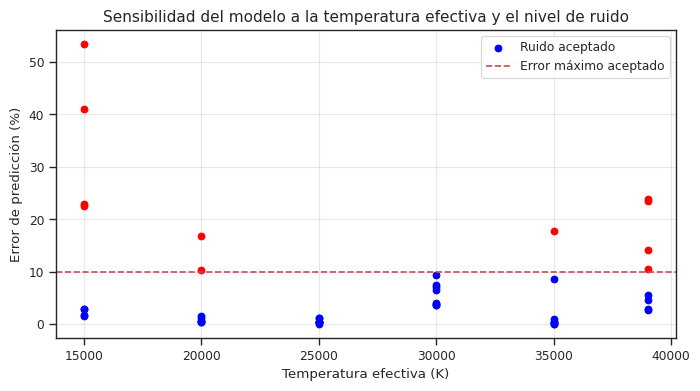

Teff Ruido_maximo_aceptado Ruido_no_aceptado
0  15000               1.0e-02           5.0e-01
1  20000               5.0e-02           5.0e-01
2  25000               5.0e-01                 -
3  30000               5.0e-01                 -
4  35000               2.5e-01           5.0e-01
5  39000               1.0e-02           5.0e-01

In [30]:
# Crear una figura y un objeto de ejes
fig, ax = plt.subplots(figsize=(8, 4))

# Configuración de gráficos
sns.set_style('ticks')
sns.set_palette(['blue', 'red'])
sns.set_context('paper')

# Crear un gráfico de dispersión con ruido en el eje Y y las temperaturas en el eje X
for i, teff in enumerate(teffs):
    errores_teff = errores_pred_teff[i * len(niveles_ruido):(i + 1) * len(niveles_ruido)]
    for j, error in enumerate(errores_teff):
        label = 'Ruido no aceptado' if i == 0 and j == 0 and error > 10 else ''
        label = 'Ruido aceptado' if i == 0 and j == 0 and error <= 10 else label
        if error > 10:
            ax.scatter(teff, error, color='red', label=label)
        else:
            ax.scatter(teff, error, color='blue', label=label)


ax.set_xlabel("Temperatura efectiva (K)")
ax.set_ylabel("Error de predicción (%)")

# Agregar una línea horizontal en el 10%
ax.axhline(y=10, color='r', linestyle='--', label='Error máximo aceptado')

# Calcular el ruido máximo permitido para cada temperatura y agregarlo al gráfico
ruido_maximo = []
for teff in teffs:
    errores_teff = df_resultados.loc[df_resultados['Teff'].astype(float) == teff, 'Error_Teff'].astype(float)
    ruido_teff = df_resultados.loc[df_resultados['Teff'].astype(float) == teff, 'Ruido'].astype(float)
    
    # Encuentra el ruido máximo antes de que el error supere el 10%
    ruido_max_teff = ruido_teff[errores_teff <= 10].max()
    ruido_maximo.append(ruido_max_teff)

# Agregar una leyenda
ax.legend()
# Agregar un título y modificar el tamaño de fuente de los ticks de los ejes
plt.title("Sensibilidad del modelo a la temperatura efectiva y el nivel de ruido", fontsize=11)
ax.tick_params(axis='both', which='major')

# Cambiar el color de la grilla a gris claro
ax.grid(color='lightgray', alpha=0.5)

# Ajustar la transparencia de la grilla
ax.grid(alpha=0.5)

plt.show()

# Mostrar el ruido máximo para cada temperatura en un DataFrame
ruido_maximo_formateado = [f"{r:.1e}" if pd.notnull(r) else '-' for r in ruido_maximo]
df_ruido_maximo = pd.DataFrame({'Teff': teffs, 'Ruido_maximo_aceptado': ruido_maximo_formateado})

# Calcular el ruido máximo no aceptado para cada temperatura y agregarlo al gráfico
ruido_no_aceptado = []
for teff in teffs:
    errores_teff = df_resultados.loc[df_resultados['Teff'].astype(float) == teff, 'Error_Teff'].astype(float)
    ruido_teff = df_resultados.loc[df_resultados['Teff'].astype(float) == teff, 'Ruido'].astype(float)
    
    # Encuentra el ruido máximo que produce un error superior al 10%
    ruido_no_aceptado_teff = ruido_teff[errores_teff > 10].max()
    ruido_no_aceptado.append(ruido_no_aceptado_teff)

# Agregar la lista de ruidos máximos no aceptados como una nueva columna al DataFrame
df_ruido_maximo["Ruido_no_aceptado"] = ruido_no_aceptado

# Formatear la columna "Ruido_no_aceptado" a notación científica con 1 decimal 
df_ruido_maximo["Ruido_no_aceptado"] = df_ruido_maximo["Ruido_no_aceptado"].apply(lambda x: "{:.1e}".format(x) if pd.notnull(x) else '-')

# Mostrar el DataFrame actualizado
df_ruido_maximo

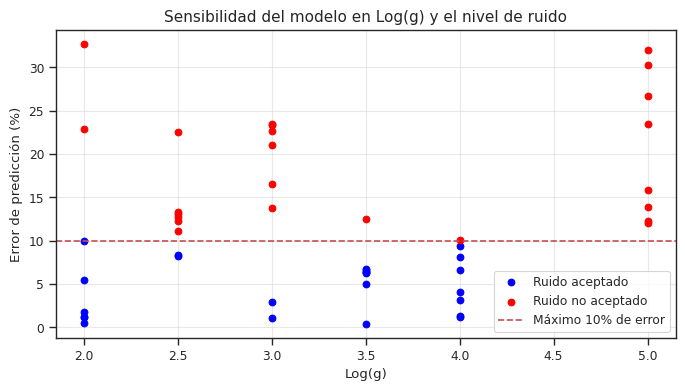

log Ruido_maximo Ruido_no_aceptado
0  2.0      5.0e-02           5.0e-01
1  2.5      5.0e-02           5.0e-01
2  3.0      5.0e-01           5.0e-02
3  3.5      2.5e-01           5.0e-01
4  4.0      5.0e-01           5.0e-02
5  5.0            -           5.0e-01

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Obtener las velocidades de rotación únicas
loggs = sorted(df_resultados['Log_g'].astype(float).unique())


# Crear una figura y un objeto de ejes
fig, ax = plt.subplots(figsize=(8, 4))

# Configuración de gráficos
sns.set_style('ticks')
sns.set_palette('viridis')
sns.set_context('paper')

label_added_red = False
label_added_blue = False

for i, log in enumerate(loggs):
    errores_log = errores_pred_logg[i * len(niveles_ruido):(i + 1) * len(niveles_ruido)]
    for j, error in enumerate(errores_log):
        if error > 10 and not label_added_red:  # Agregar el punto rojo y su label solo una vez
            ax.scatter(log, error, color='red', label='Ruido no aceptado')
            label_added_red = True  # Se agrega el punto rojo en la leyenda
        elif error <= 10 and not label_added_blue:  # Se agrega el punto  azul y su label solo una vez
            ax.scatter(log, error, color='blue', label='Ruido aceptado')
            label_added_blue = True 
        else: 
            if error > 10:
                ax.scatter(log, error, color='red')
            else:
                ax.scatter(log, error, color='blue')
            
ax.set_xlabel("Log(g)")
ax.set_ylabel("Error de predicción (%)")

# Agregar una línea horizontal en el 10%
maximo_error_aceptado = 10
ax.axhline(y=maximo_error_aceptado, color='r', linestyle='--', label='Máximo 10% de error')

# Calcular el ruido máximo permitido para cada Log(g) y agregarlo al gráfico
ruido_maximo = []
for log in loggs:
    errores_log = df_resultados.loc[df_resultados['Log_g'].astype(float) == log, 'Error_Log_g'].astype(float)
    ruido_log = df_resultados.loc[df_resultados['Log_g'].astype(float) == log, 'Ruido'].astype(float)
    
    # Encontrar el ruido máximo antes de que el error supere el 10%
    ruido_max_log = ruido_log[errores_log <= 10].max()
    ruido_maximo.append(ruido_max_log)

# Agregar una leyenda
ax.legend()

# Agregar un título y modificar el tamaño de fuente de los ticks de los ejes
plt.title("Sensibilidad del modelo en Log(g) y el nivel de ruido", fontsize=11)
ax.tick_params(axis='both', which='major')

# Cambiar el color de la grilla a gris claro y ajustar la transparencia
ax.grid(color='lightgray', alpha=0.5)

# Mostrar el gráfico
plt.show()

# Mostrar el ruido máximo para cada Log(g) en un DataFrame
ruido_maximo_formateado = [f"{r:.1e}" if pd.notnull(r) else '-' for r in ruido_maximo]
df_ruidos_log = pd.DataFrame({'log': loggs, 'Ruido_maximo': ruido_maximo_formateado})

# Calcular el ruido máximo no aceptado para cada Log(g) y agregarlo al DataFrame
ruido_no_aceptado = []
for log in loggs:
    errores_log = df_resultados.loc[df_resultados['Log_g'].astype(float) == log, 'Error_Log_g'].astype(float)
    ruido_log = df_resultados.loc[df_resultados['Log_g'].astype(float) == log, 'Ruido'].astype(float)
    
    # Encontrar el ruido máximo que produce un error superior al 10%
    ruido_no_aceptado_log = ruido_log[errores_log > 10].max()
    ruido_no_aceptado.append(ruido_no_aceptado_log)

# Agregar la lista como una nueva columna al DataFrame
df_ruidos_log["Ruido_no_aceptado"] = ruido_no_aceptado

# Modificar la columna "Ruido_no_aceptado" a notación científica con 1 decimal
df_ruidos_log["Ruido_no_aceptado"] = df_ruidos_log["Ruido_no_aceptado"].apply(lambda x: "{:.1e}".format(x) if pd.notnull(x) else '-')

# Ordenar el DataFrame por la columna 'log'
df_ruidos_log = df_ruidos_log.sort_values(by='log')

df_ruidos_log

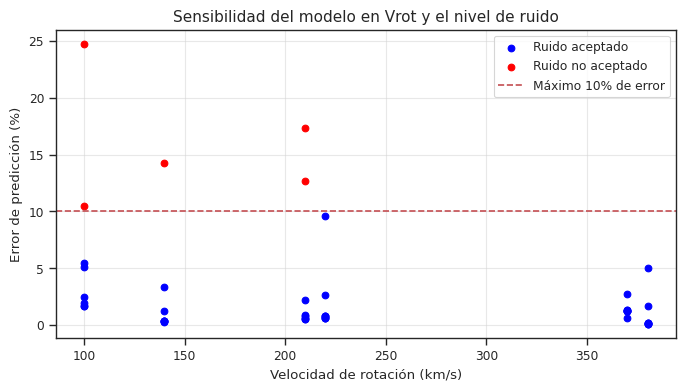

Vrot Ruido_maximo Ruido_no_aceptado
5  100.0      5.0e-02           5.0e-01
3  140.0      2.5e-01           5.0e-01
1  210.0      5.0e-02           5.0e-01
4  220.0      5.0e-01                 -
0  370.0      5.0e-01                 -
2  380.0      5.0e-01                 -

In [32]:
# Obtener las velocidades de rotación únicas
vrots = df_resultados['Vrot'].astype(float).unique()

# Crear una figura y un objeto de ejes
fig, ax = plt.subplots(figsize=(8, 4))

# Configuración de gráficos
sns.set_style('ticks')
sns.set_palette('viridis')
sns.set_context('paper')

label_added_red = False
label_added_blue = False

for i, vrot in enumerate(vrots):
    errores_vrot = errores_pred_vrot[i * len(niveles_ruido):(i + 1) * len(niveles_ruido)]
    for j, error in enumerate(errores_vrot):
        if error > 10 and not label_added_red:  # Agregar el punto rojo y su label solo una vez
            ax.scatter(vrot, error, color='red', label='Ruido no aceptado')
            label_added_red = True  # Se agrega el punto rojo en la leyenda
        elif error <= 10 and not label_added_blue:  # Se agrega el punto  azul y su label solo una vez
            ax.scatter(vrot, error, color='blue', label='Ruido aceptado')
            label_added_blue = True 
        else: 
            if error > 10:
                ax.scatter(vrot, error, color='red')
            else:
                ax.scatter(vrot, error, color='blue')
                
ax.set_xlabel("Velocidad de rotación (km/s)")
ax.set_ylabel("Error de predicción (%)")

# Agregar una línea horizontal en el 10%
maximo_error_aceptado = 10
ax.axhline(y=maximo_error_aceptado, color='r', linestyle='--', label='Máximo 10% de error')

# Calcular el ruido máximo permitido para cada velocidad de rotación y agregarlo al gráfico
ruido_maximo = []
for vrot in vrots:
    errores_vrot = df_resultados.loc[df_resultados['Vrot'].astype(float) == vrot, 'Error_Vrot'].astype(float)
    ruido_vrot = df_resultados.loc[df_resultados['Vrot'].astype(float) == vrot, 'Ruido'].astype(float)
    
    # Encontrar el ruido máximo antes de que el error supere el 10%
    ruido_max_vrot = ruido_vrot[errores_vrot <= 10].max()
    ruido_maximo.append(ruido_max_vrot)

# Agregar una leyenda
ax.legend()

# Agregar un título y modificar el tamaño de fuente de los ticks de los ejes
plt.title("Sensibilidad del modelo en Vrot y el nivel de ruido", fontsize=11)
ax.tick_params(axis='both', which='major')

# Cambiar el color de la grilla a gris claro y ajustar la transparencia
ax.grid(color='lightgray', alpha=0.5)

# Mostrar el gráfico
plt.show()

# Mostrar el ruido máximo para cada velocidad de rotación en un DataFrame
ruido_maximo_formateado = [f"{r:.1e}" if pd.notnull(r) else '-' for r in ruido_maximo]
df_ruidos_vrot = pd.DataFrame({'Vrot': vrots, 'Ruido_maximo': ruido_maximo_formateado})

# Calcular el ruido máximo no aceptado para cada temperatura y agregarlo al gráfico
ruido_no_aceptado = []
for vrot in vrots:
    errores_vrot = df_resultados.loc[df_resultados['Vrot'].astype(float) == vrot, 'Error_Vrot'].astype(float)
    ruido_vrot = df_resultados.loc[df_resultados['Vrot'].astype(float) == vrot, 'Ruido'].astype(float)
    
    # Encontrar el ruido máximo que produce un error superior al 10%
    ruido_no_aceptado_vrot = ruido_vrot[errores_vrot > 10].max()
    ruido_no_aceptado.append(ruido_no_aceptado_vrot)

# Agregar la lista como una nueva columna al DataFrame
df_ruidos_vrot["Ruido_no_aceptado"] = ruido_no_aceptado

# Modificar la columna "Ruido_no_aceptado" a notación científica con 1 decimal
df_ruidos_vrot["Ruido_no_aceptado"] = df_ruidos_vrot["Ruido_no_aceptado"].apply(lambda x: "{:.1e}".format(x) if pd.notnull(x) else '-')

# Ordenar el DataFrame por la columna 'Vrot'
df_ruidos_vrot = df_ruidos_vrot.sort_values(by='Vrot')

df_ruidos_vrot
